In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler


#os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
os.chdir('C:\\Users\\Daniel\\Python and R Notebooks\\CAP2020\\CAP2020')

In [2]:
path = 'data\\processed\\df_quarter_roe_07_18.csv'
df = pd.read_csv(path)
df.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
df.index = df['Stock']
df.drop('Stock', axis=1, inplace=True)
df=df.T
df.index.names=['date']
df.index = pd.to_datetime(df.index, errors = 'ignore')

In [3]:
df

Stock          AAN    AAPL     AAP      AA    ABMD     ABT     ACC     ACE  \
date                                                                         
2007-03-31  0.1441  0.2605  0.2292  0.1562 -0.3630  0.1047  0.0433  0.1823   
2007-06-30  0.1375  0.2674  0.2195  0.1482 -0.3357  0.1298  0.0432  0.1790   
2007-09-30  0.1307  0.2719  0.2159  0.1464 -0.3011  0.1300  0.0412  0.1767   
2007-12-31  0.1220  0.2858  0.2157  0.1603 -0.2839  0.2288 -0.0045  0.1641   
2008-03-31  0.1128  0.2770  0.2298  0.1371 -0.3838  0.2307  0.0199  0.1395   
2008-06-30  0.1155  0.2667  0.2464  0.1268 -0.4145  0.2377  0.0140  0.1430   
2008-09-30  0.1200  0.2561  0.2441  0.1104 -0.3695  0.2456 -0.0055  0.1075   
2008-12-31  0.1241  0.2381  0.2310 -0.0050 -0.3454  0.2647 -0.0182  0.0762   
2009-03-31  0.1334  0.2284  0.2294 -0.0627 -0.2725  0.2920 -0.0224  0.0912   
2009-06-30  0.1339  0.2199  0.2225 -0.1446 -0.2486  0.2865 -0.0263  0.0770   
2009-09-30  0.1333  0.3145  0.2164 -0.1652 -0.2671  0.2998 -0.0170  0.1003   
2009-12-31  0.1330  0.3404  0.2155 -0.0908 -0.2492  0.2802 -0.0126  0.1463   
2010-03-31  0.1304  0.3582  0.2314 -0.0672 -0.1696  0.2501 -0.0146  0.1448   
2010-06-30  0.1227  0.3710  0.2583 -0.0209 -0.1601  0.2502 -0.0081  0.1432   
2010-09-30  0.1209  0.3376  0.2890 -0.0221 -0.1219  0.2222  0.0026  0.1448   
2010-12-31  0.1239  0.3599  0.3177  0.0195 -0.0879  0.2188  0.0134  0.1415   
2011-03-31  0.1286  0.3777  0.3352  0.0564 -0.1156  0.2032  0.0297  0.1153   
2011-06-30  0.1131  0.4048  0.3744  0.0664 -0.0989  0.2168  0.0441  0.1090   
2011-09-30  0.1159  0.3956  0.4344  0.0722 -0.0613  0.1857  0.0413  0.0780   
2011-12-31  0.1157  0.4435  0.4822  0.0414 -0.0256  0.1890  0.0433  0.0662   
2012-03-31  0.1417  0.4563  0.4971  0.0272  0.0128  0.2025  0.0435  0.0940   
2012-06-30  0.1641  0.4214  0.4423  0.0052  0.0758  0.1975  0.0358  0.0812   
2012-09-30  0.1589  0.3951  0.3859 -0.0176  0.1093  0.2575  0.0307  0.1048   
2012-12-31  0.1587  0.3632  0.3528  0.0141  0.1038  0.2301  0.0300  0.1024   
2013-03-31  0.1359  0.3220  0.3208  0.0183  0.1103  0.2089  0.0267  0.0993   
2013-06-30  0.1230  0.2993  0.3147  0.0097  0.0733  0.1629  0.0218  0.1184   
2013-09-30  0.1126  0.2906  0.3065  0.0226  0.0408  0.1275  0.0387  0.1270   
2013-12-31  0.1009  0.2893  0.2787 -0.1849  0.0507  0.1091  0.0403  0.1339   
2014-03-31  0.0905  0.3036  0.2776 -0.2204  0.0474  0.1009  0.0430  0.1245   
2014-06-30  0.0764  0.3120  0.2724 -0.2036  0.0453  0.0990  0.0453  0.1174   
2014-09-30  0.0669  0.3276  0.2650 -0.1947  0.0601  0.0818  0.0249  0.1112   
2014-12-31  0.0653  0.3736  0.2666  0.0208  0.1039  0.0995  0.0246  0.0957   
2015-03-31  0.0729  0.3944  0.2506  0.0506  0.5458  0.1860  0.0400  0.0936   
2015-06-30  0.0966  0.4146  0.2414  0.0487  0.5119  0.2015  0.0397  0.0997   
2015-09-30  0.1055  0.4294  0.2273  0.0384  0.4551  0.2075  0.0415  0.0918   
2015-12-31  0.1024  0.4279  0.2034 -0.0324  0.3950  0.2020  0.0409  0.0965   
2016-03-31  0.1000  0.4024  0.1978 -0.0467  0.1127  0.1133  0.0303  0.0775   
2016-06-30  0.0960  0.3789  0.1790 -0.0470  0.1186  0.1084  0.0297  0.0628   
2016-09-30  0.0978  0.3559  0.1691 -0.0377  0.1163  0.0654  0.0306  0.0752   
2016-12-31  0.0958  0.3494  0.1649 -0.0980  0.1235  0.0674  0.0286  0.0872   
2017-03-31  0.0969  0.3509  0.1416 -0.0815  0.1267  0.0641  0.0252  0.0992   
2017-06-30  0.0941  0.3540  0.1245 -0.0899  0.1669  0.0446  0.0189  0.1094   
2017-09-30  0.0896  0.3629  0.1149 -0.1222  0.1807  0.0725  0.0158  0.0794   
2017-12-31  0.1844  0.3737  0.1486 -0.0232  0.1599  0.0149  0.0197  0.0768   
2018-03-31  0.1766  0.3997  0.1514 -0.0536  0.1799  0.0148  0.0174  0.0758   
2018-06-30  0.1727  0.4350  0.1545 -0.0690  0.2488  0.0293  0.0312  0.0753   
2018-09-30  0.1785  0.4868  0.1554 -0.0594  0.2684  0.0283  0.0309  0.1006   
2018-12-31  0.1117  0.5092  0.1176  0.1208  0.2903  0.0764  0.0333  0.0779   

Stock         ACIW    ADBE  ...      WY     XEC     XEL    XLNX     XOM  \
date                    

In [4]:
len(df.columns)

426

## Dates

In [5]:
dates = df.index

## Sample Plot

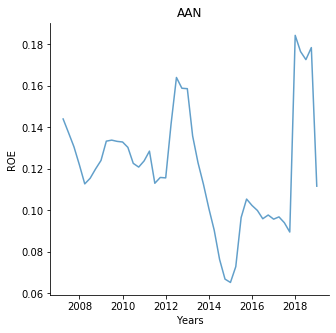

In [12]:
sub_title_font =10
legend_font =10
axis_font = 10
tick_rotation = 0
black_dot = 2
red_dot = 5

fig, ax = plt.subplots(1,1, figsize=(5,5))

### Company Timeseries            
wt = ax.plot(dates, df['AAN'].values, label='Quarterly ROE', alpha=0.7)

plt.xlabel('Years')
plt.ylabel('ROE')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('AAN')
ax.tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
ax.tick_params(axis="y", labelsize=axis_font)
plt.show()

## Grid Plot for each company (426)

In [13]:
### matrix of subplots
n_stocks = len(df.columns)
n_cols = 3
n_rows = 3
n_plots = n_cols*n_rows
nloops = int(np.floor(n_stocks/n_plots))
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)









Batch 0


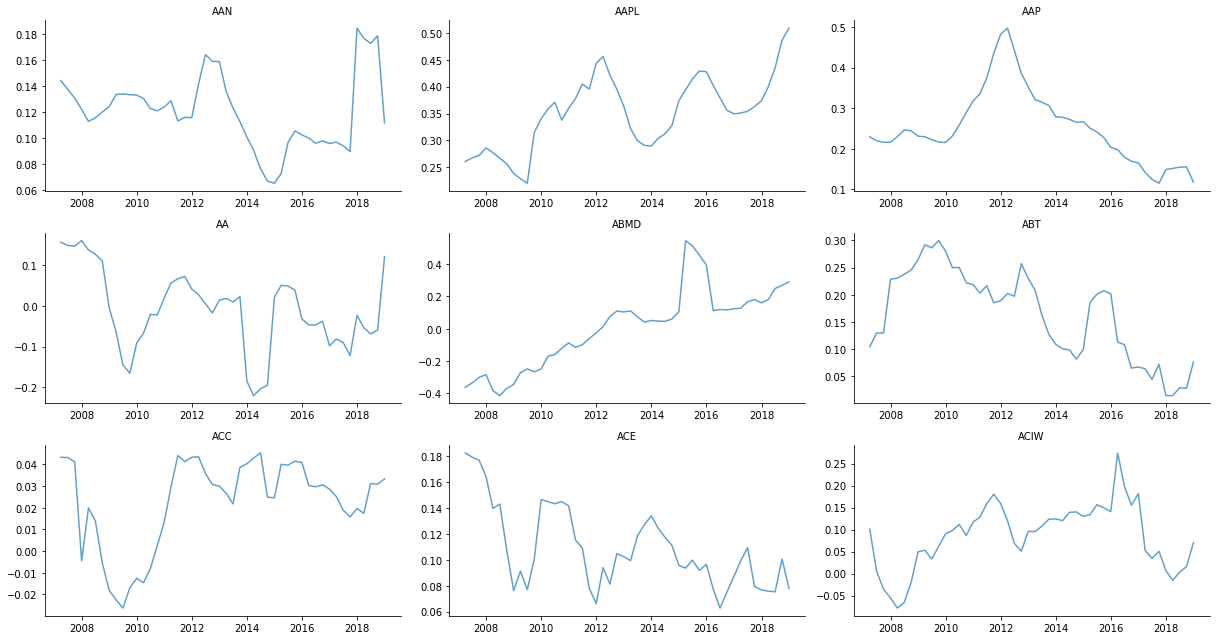









Batch 1


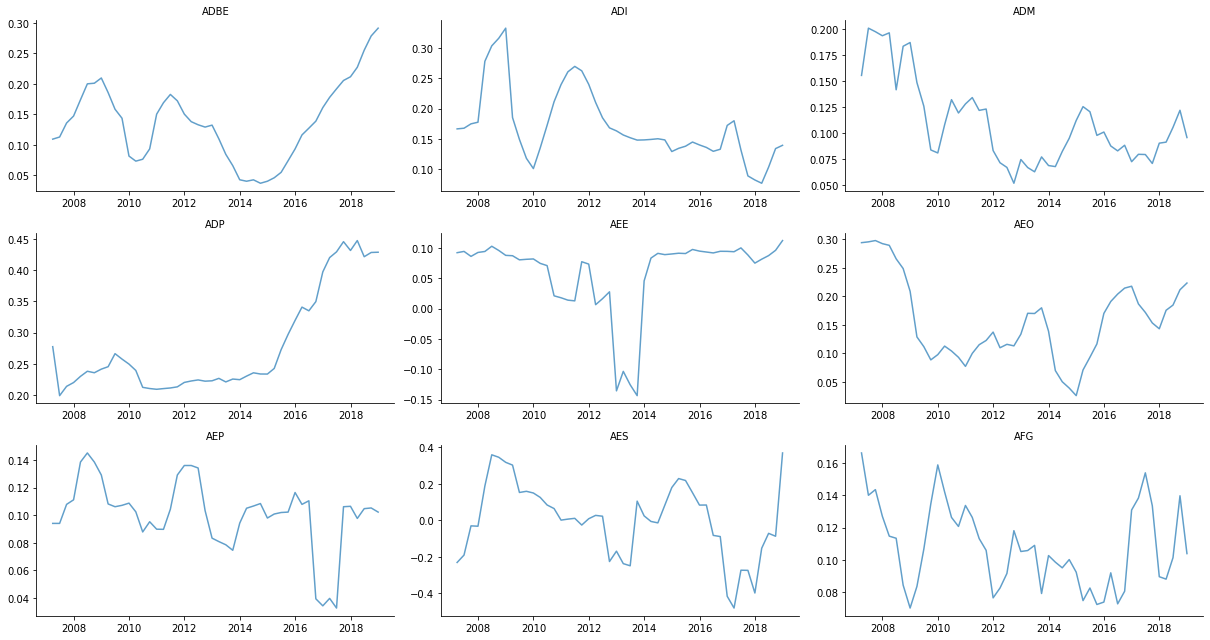









Batch 2


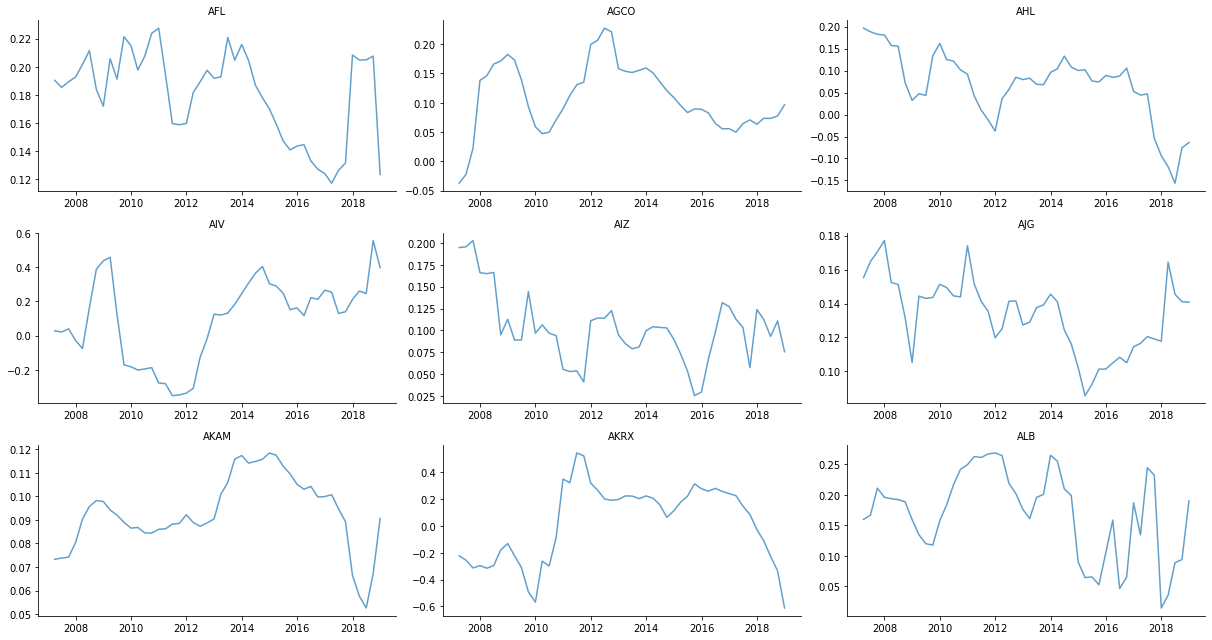









Batch 3


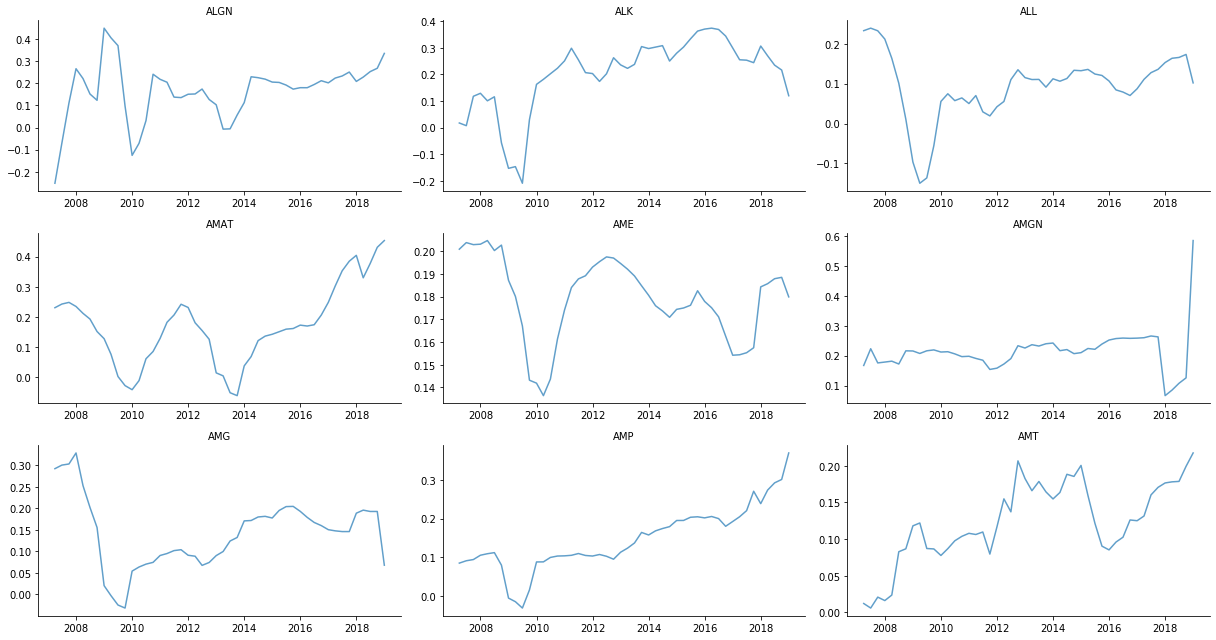









Batch 4


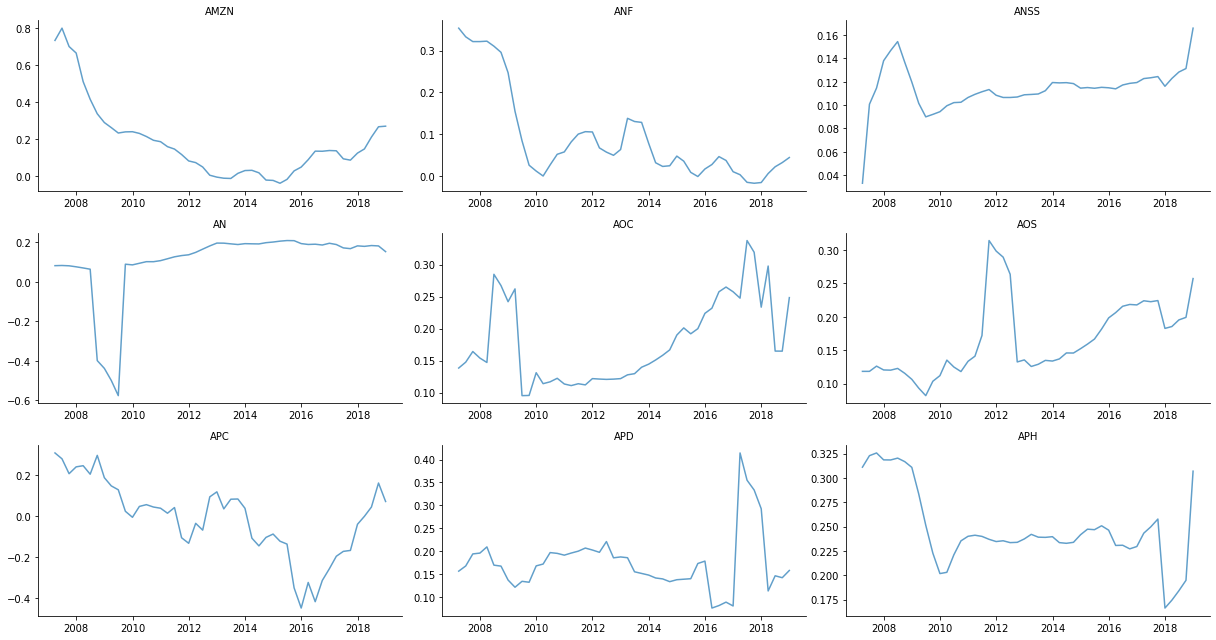









Batch 5


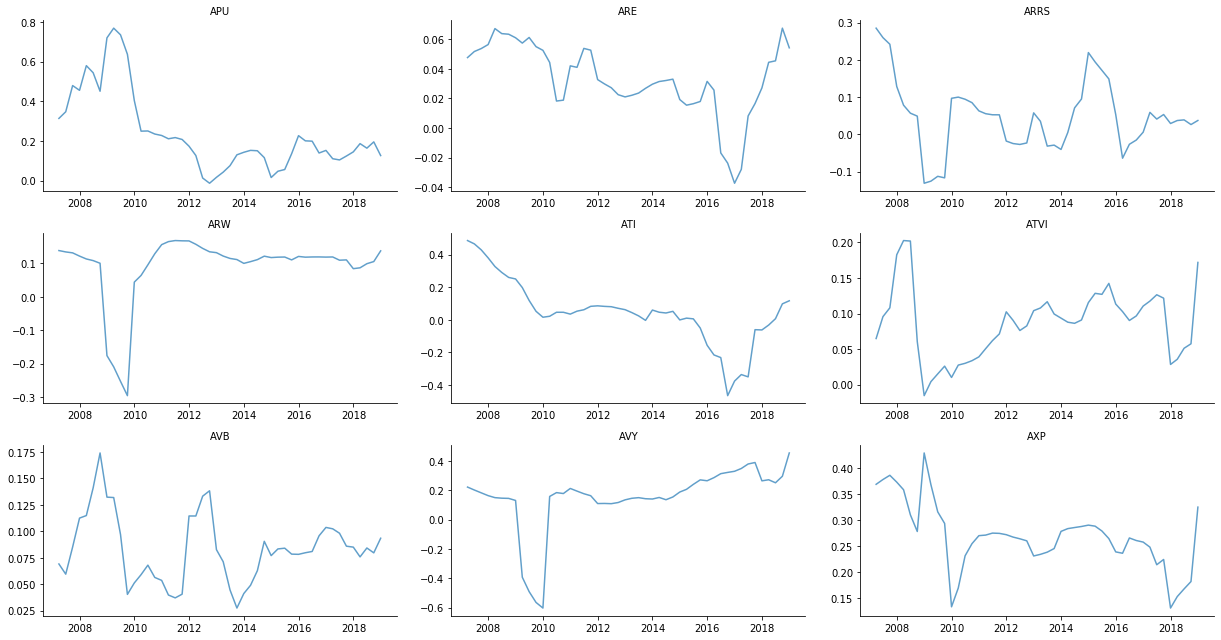









Batch 6


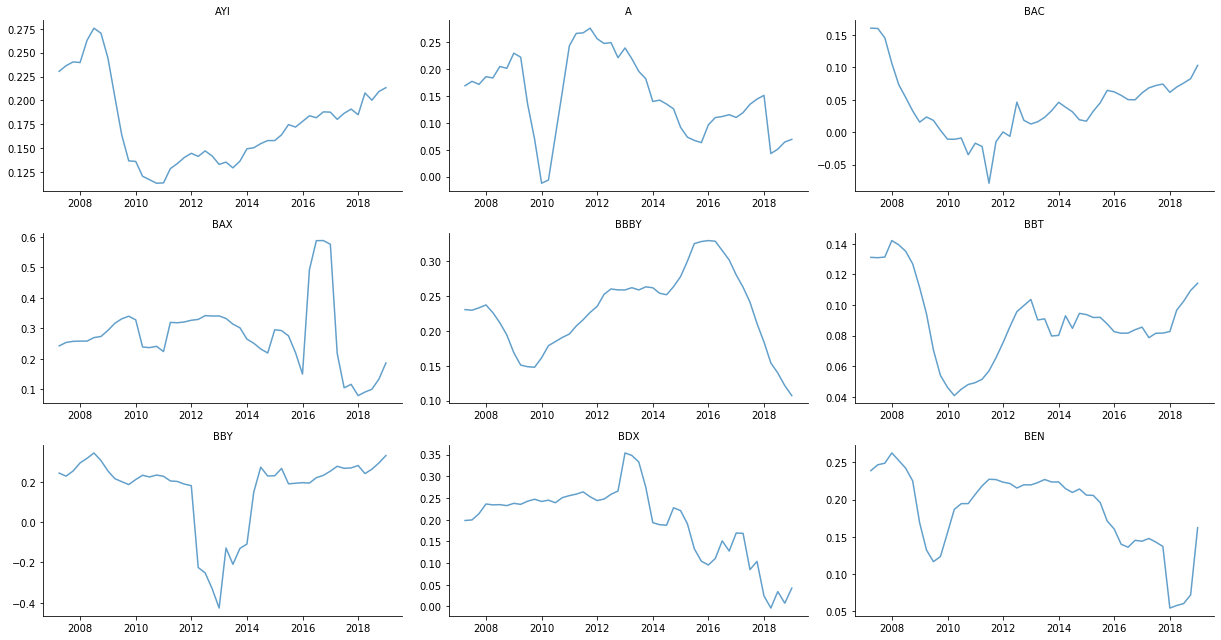









Batch 7


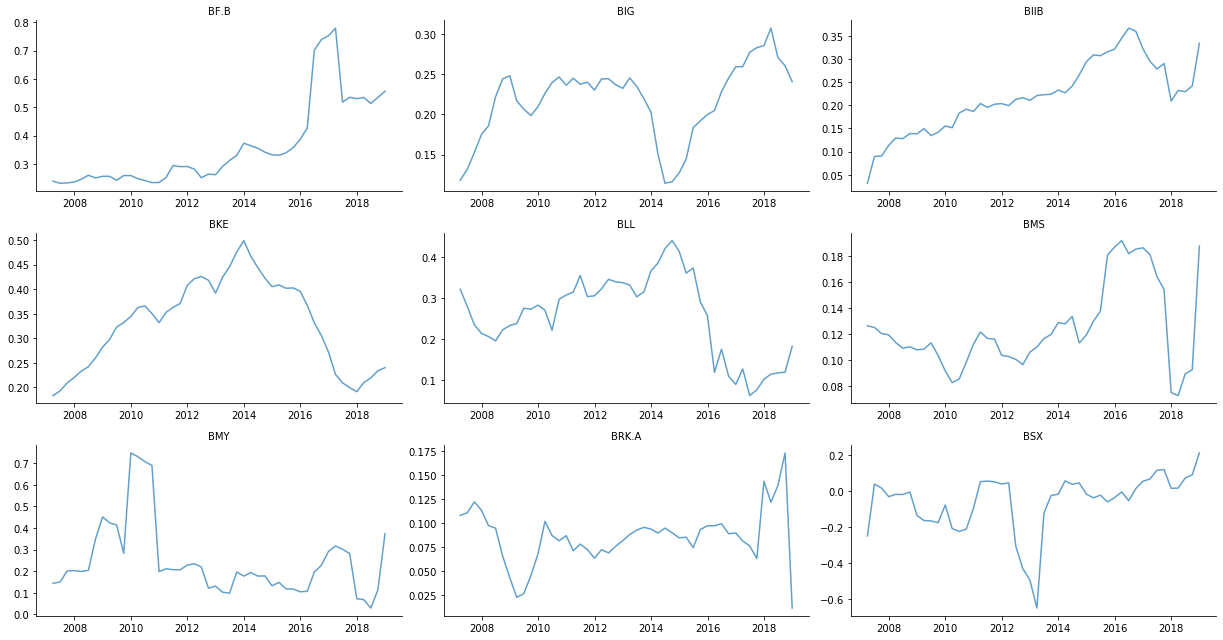









Batch 8


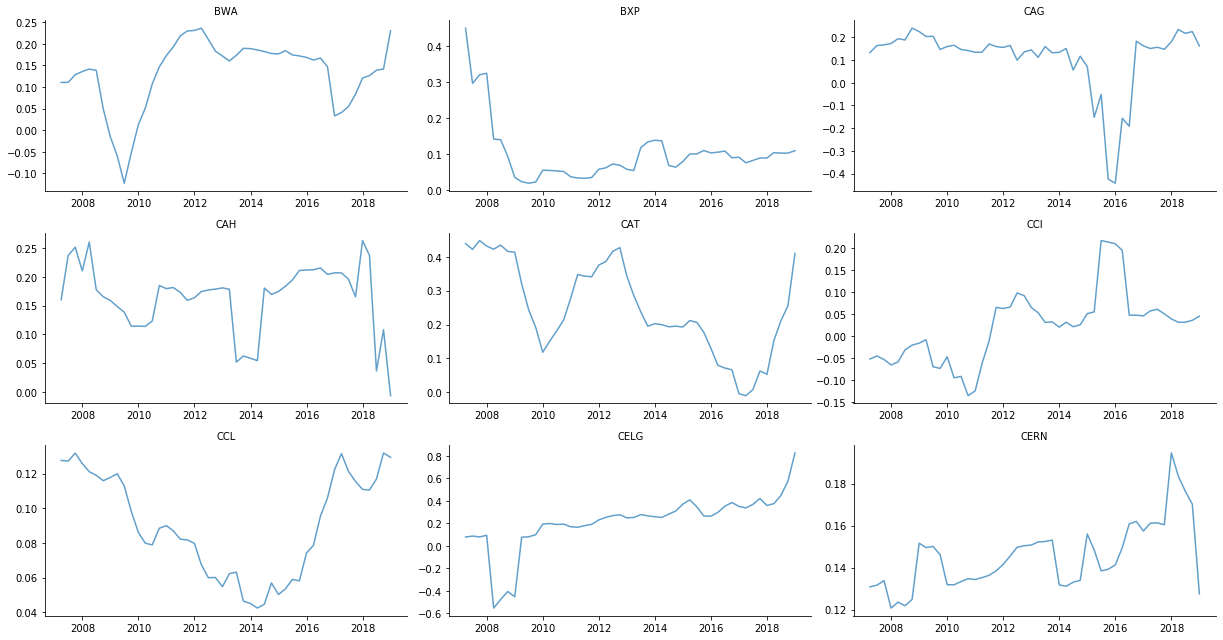









Batch 9


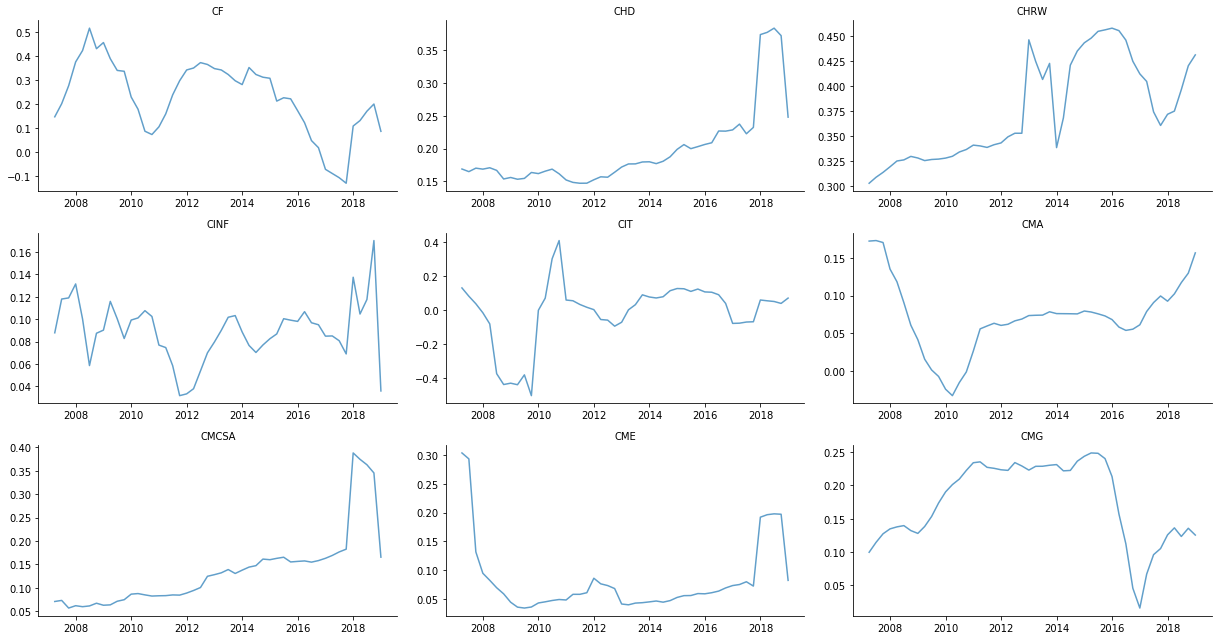









Batch 10


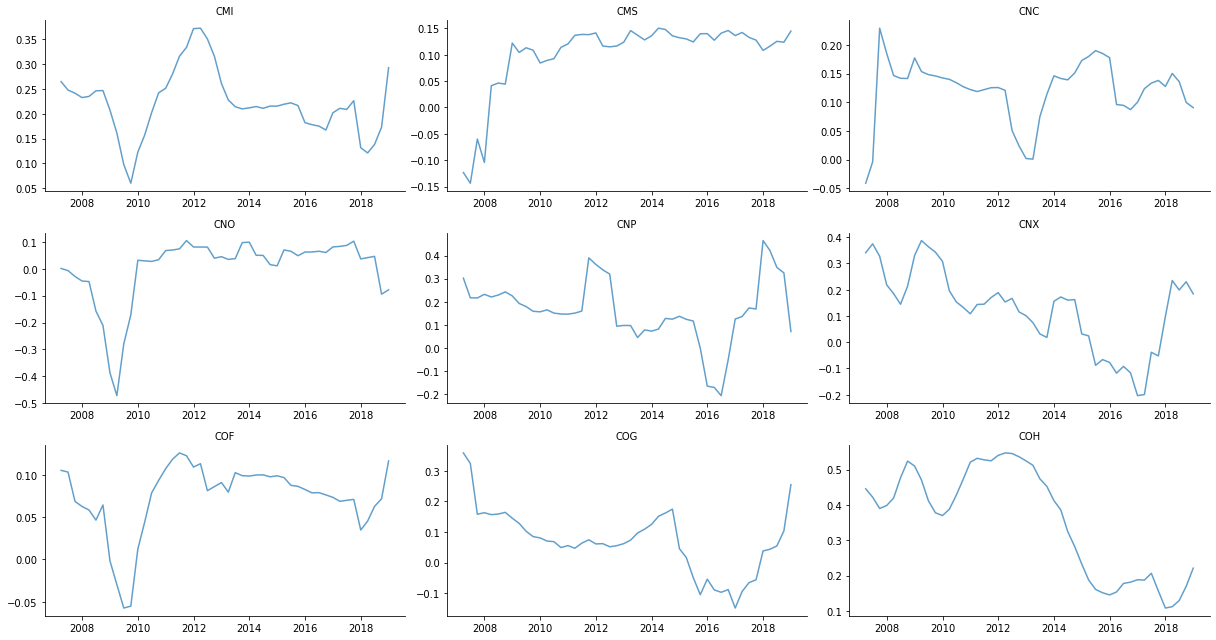









Batch 11


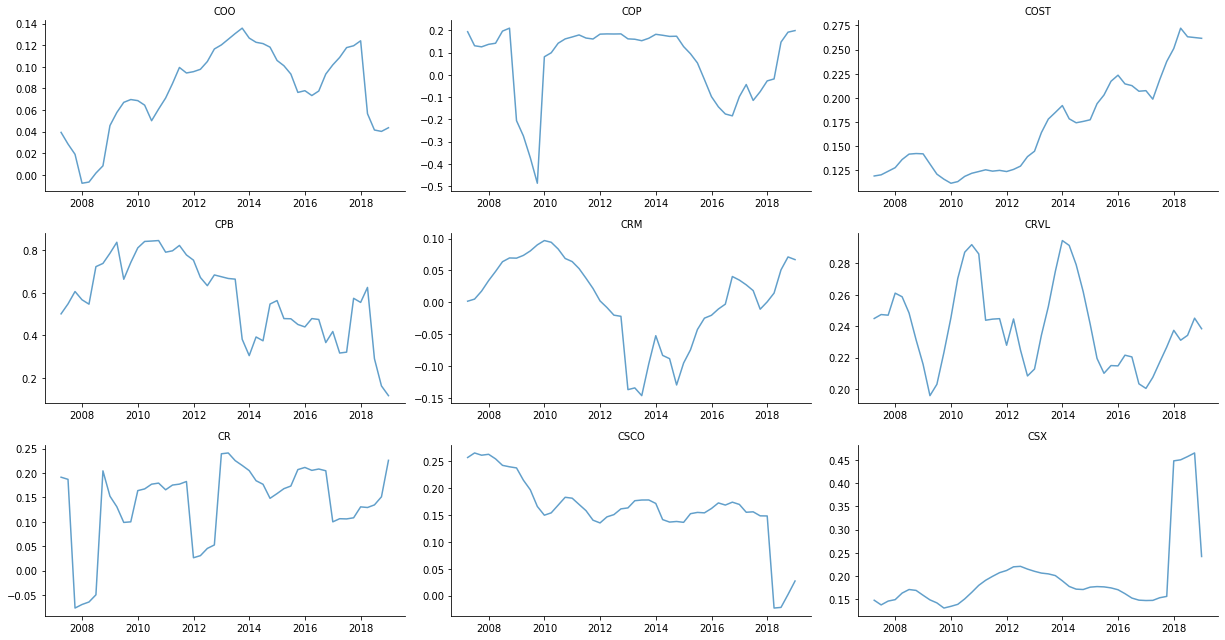









Batch 12


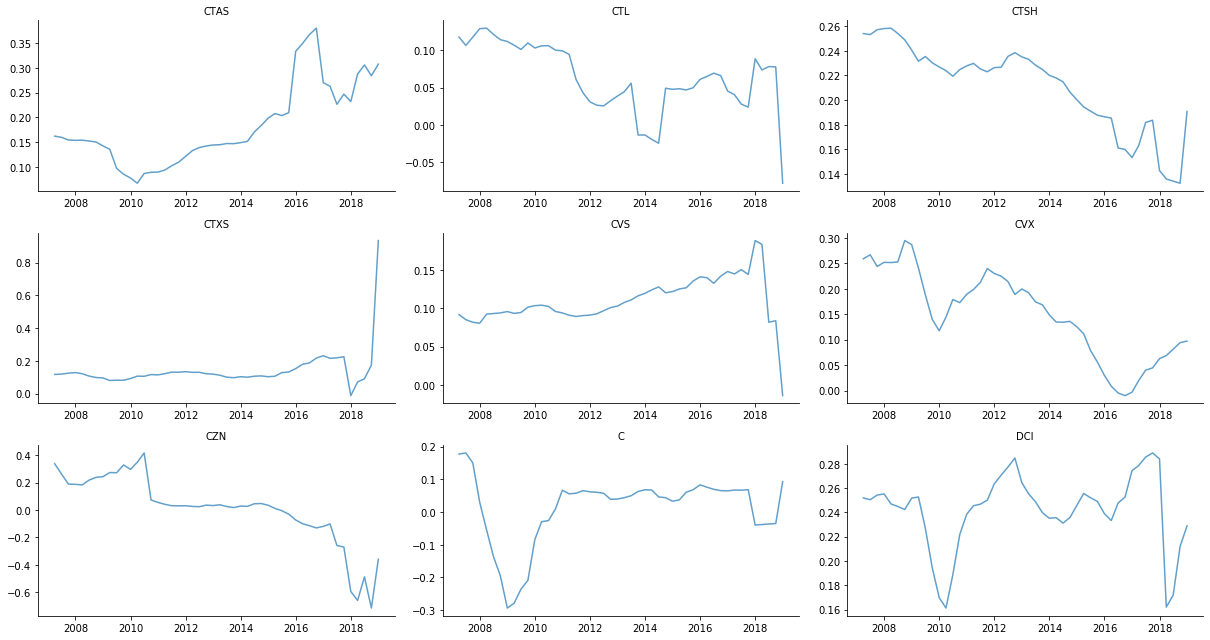









Batch 13


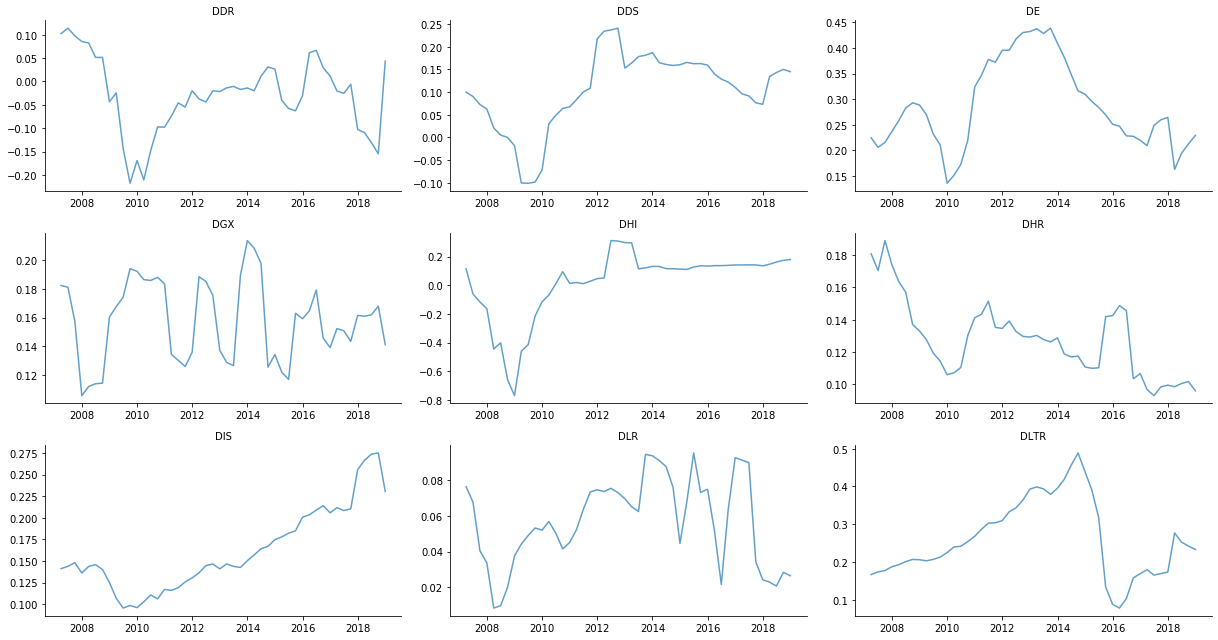









Batch 14


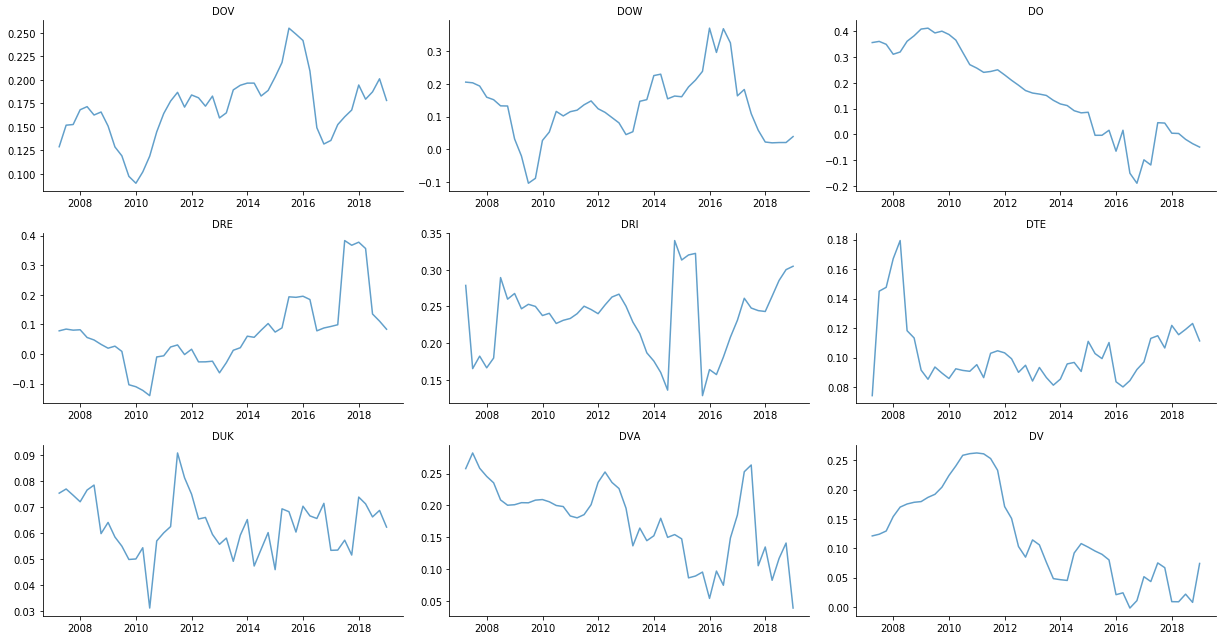









Batch 15


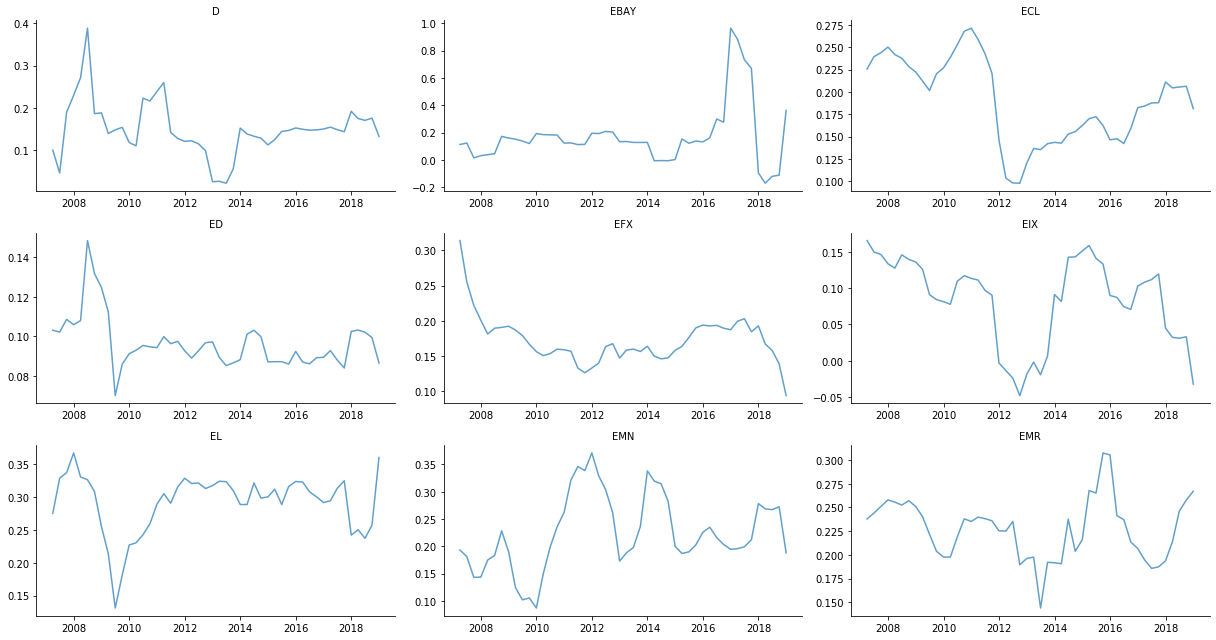









Batch 16


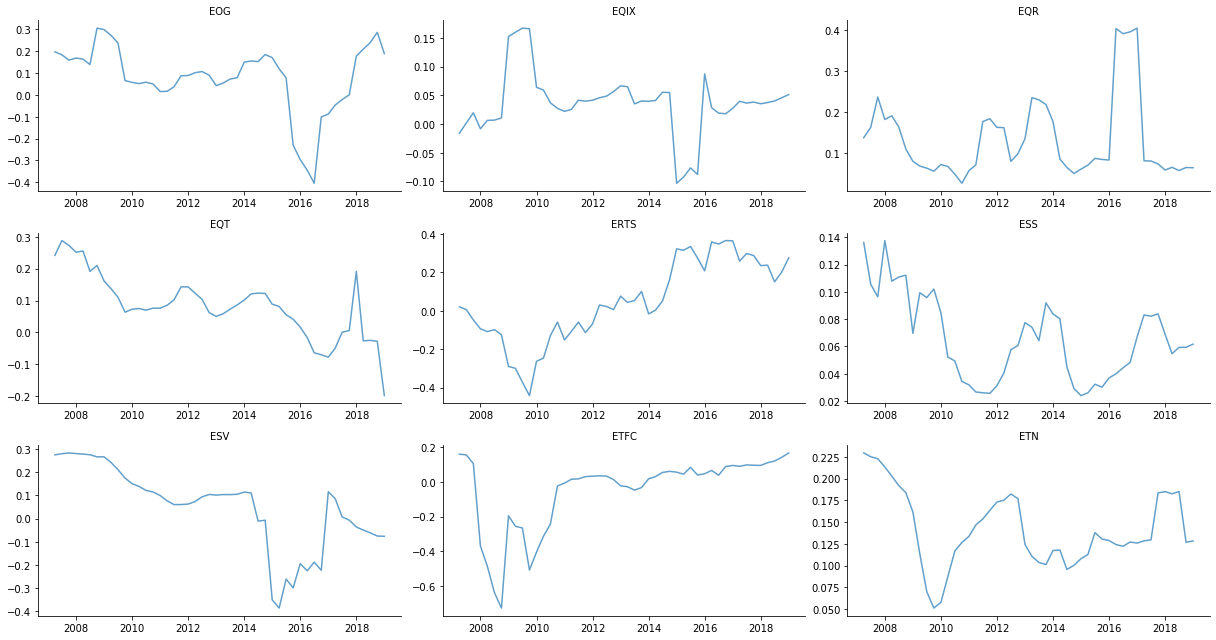









Batch 17


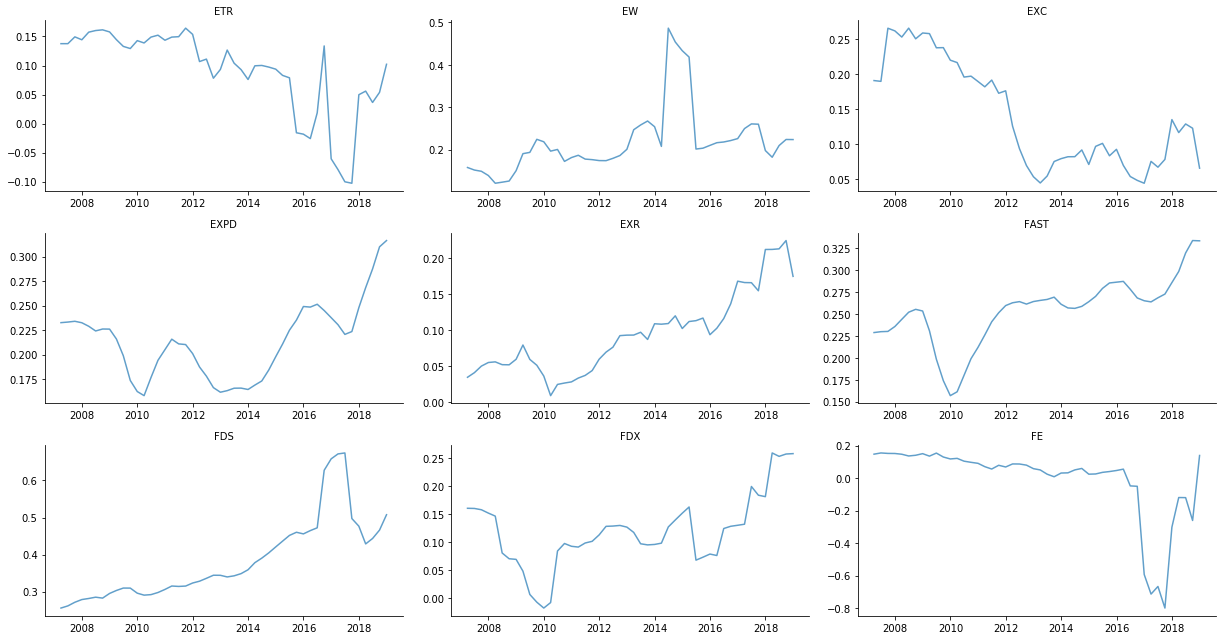









Batch 18


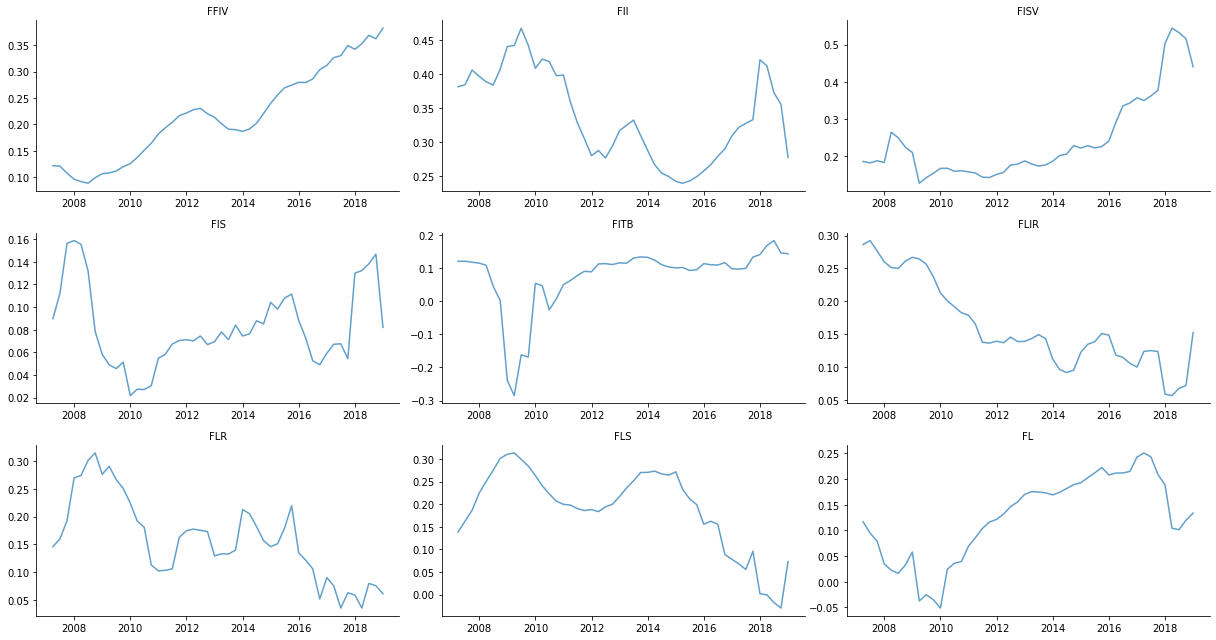









Batch 19


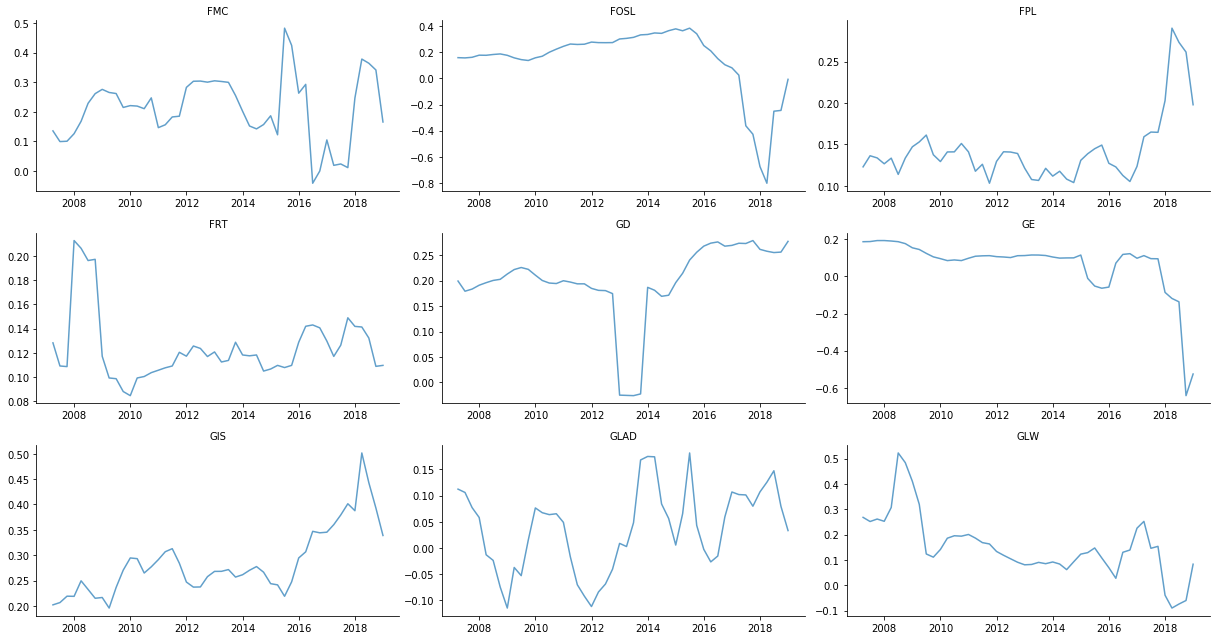









Batch 20


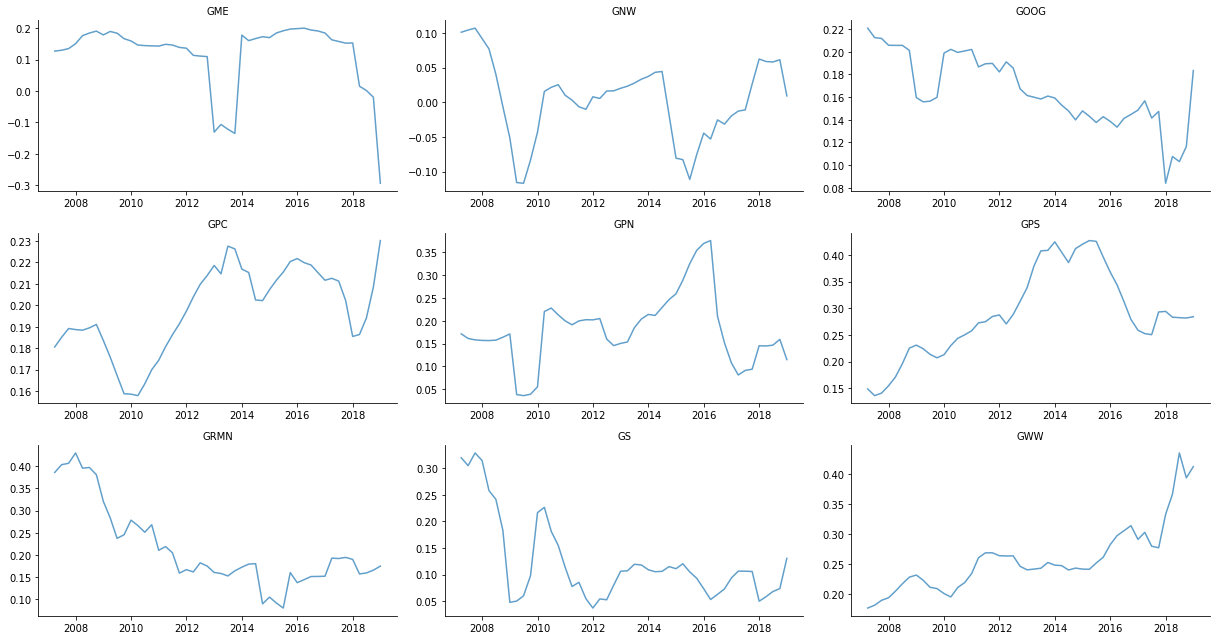









Batch 21


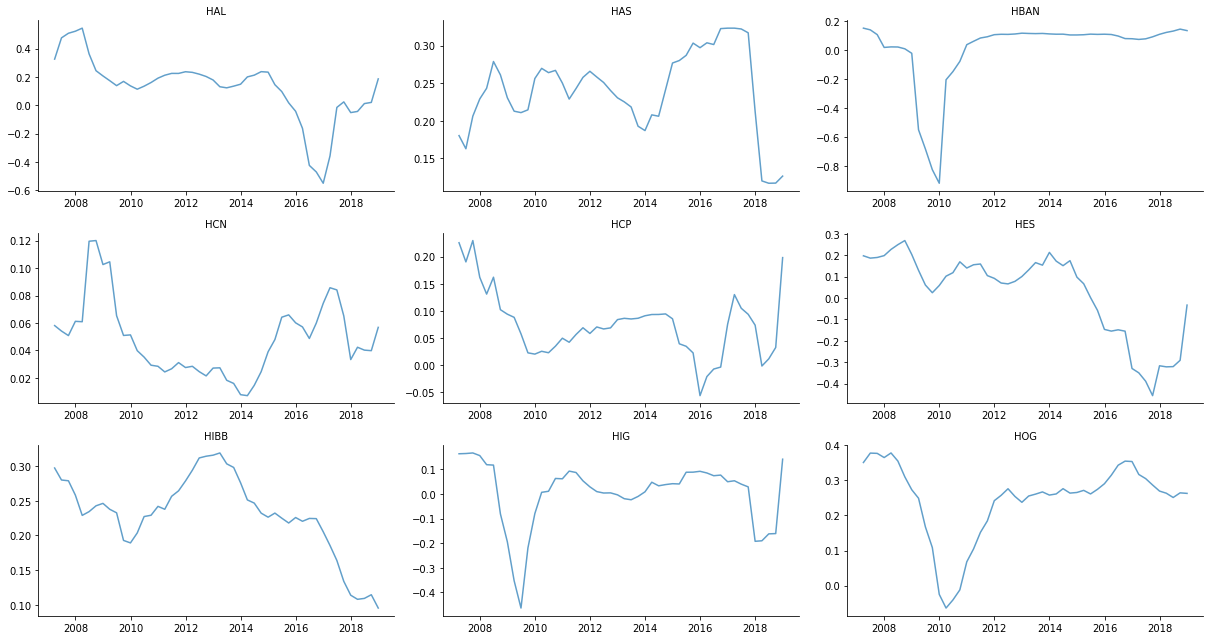









Batch 22


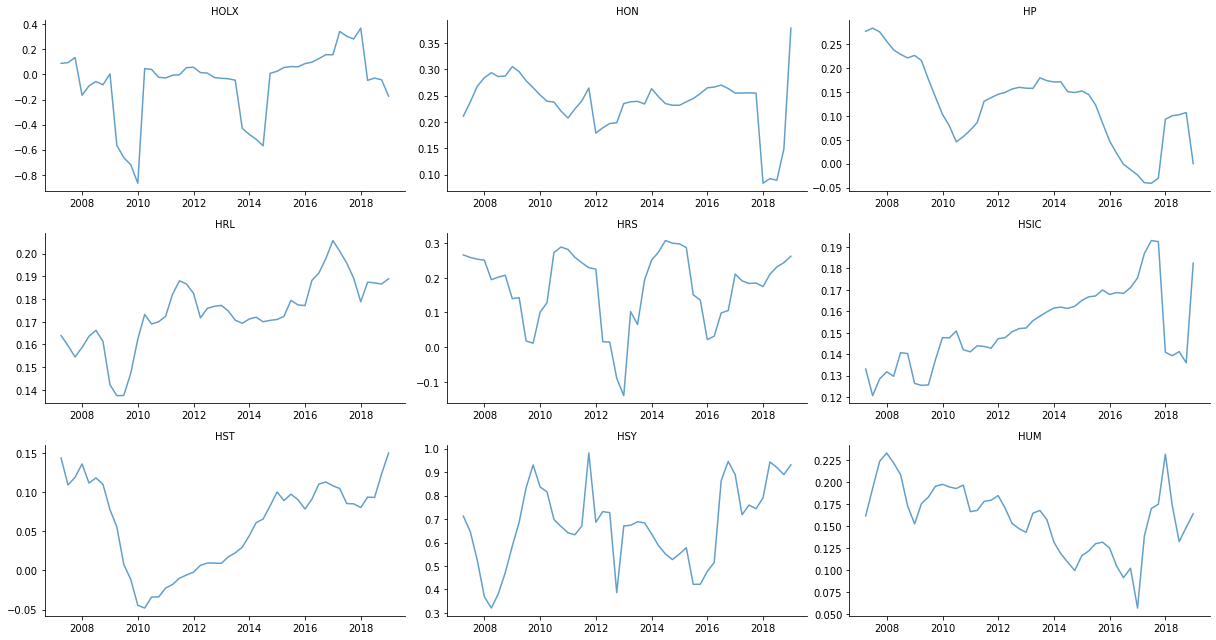









Batch 23


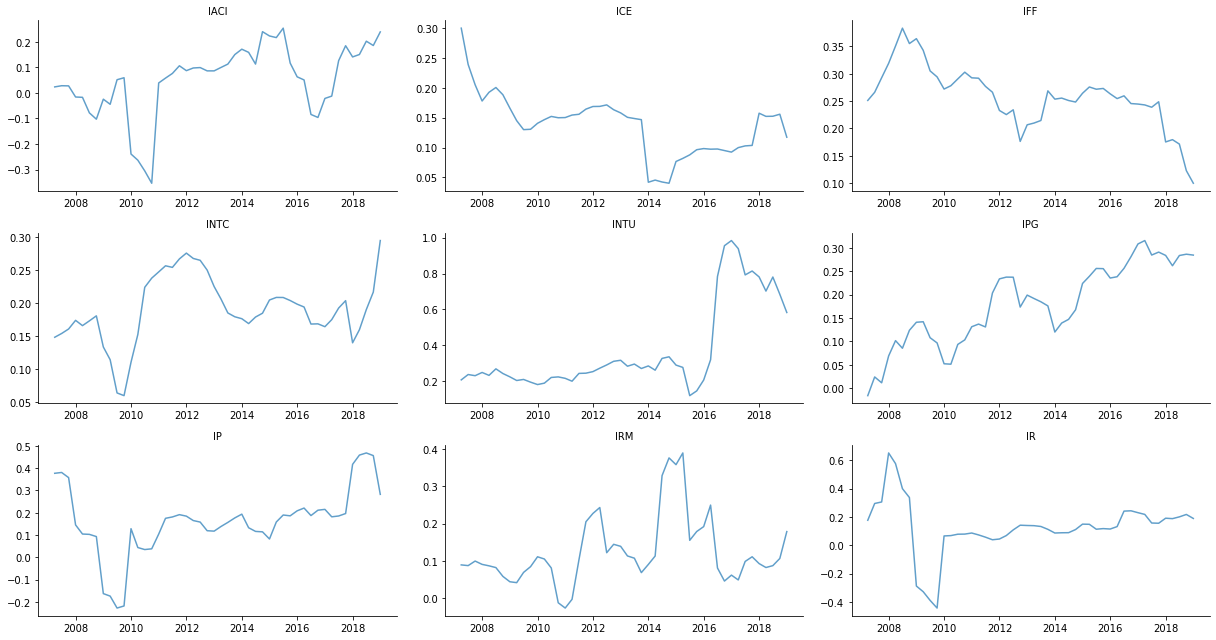









Batch 24


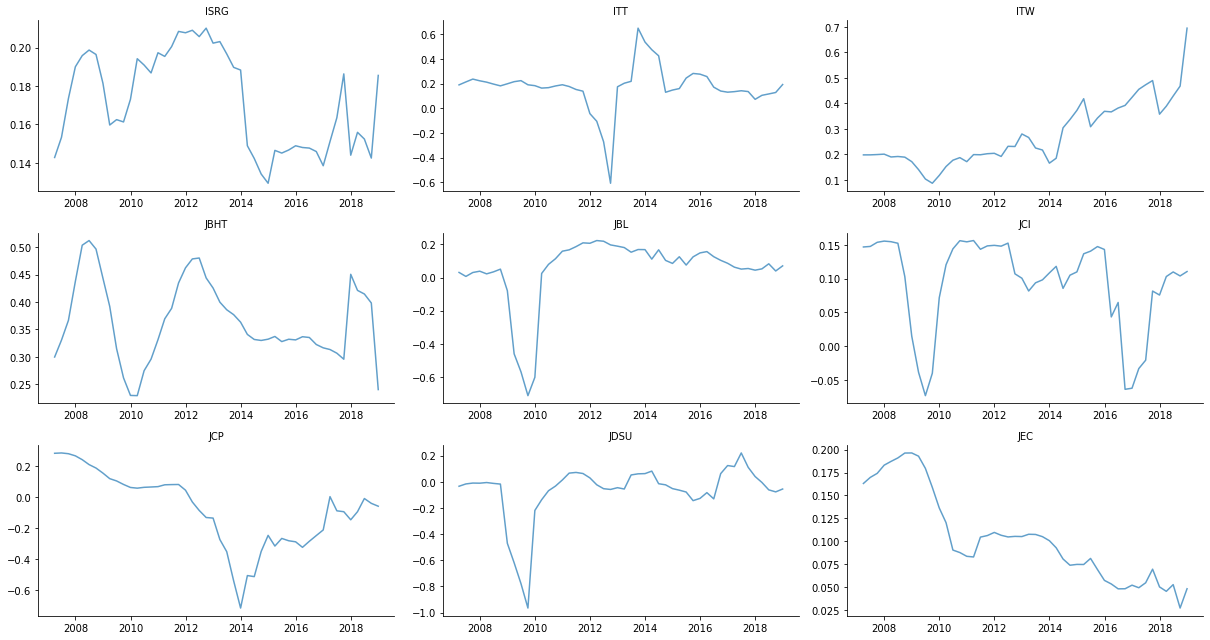









Batch 25


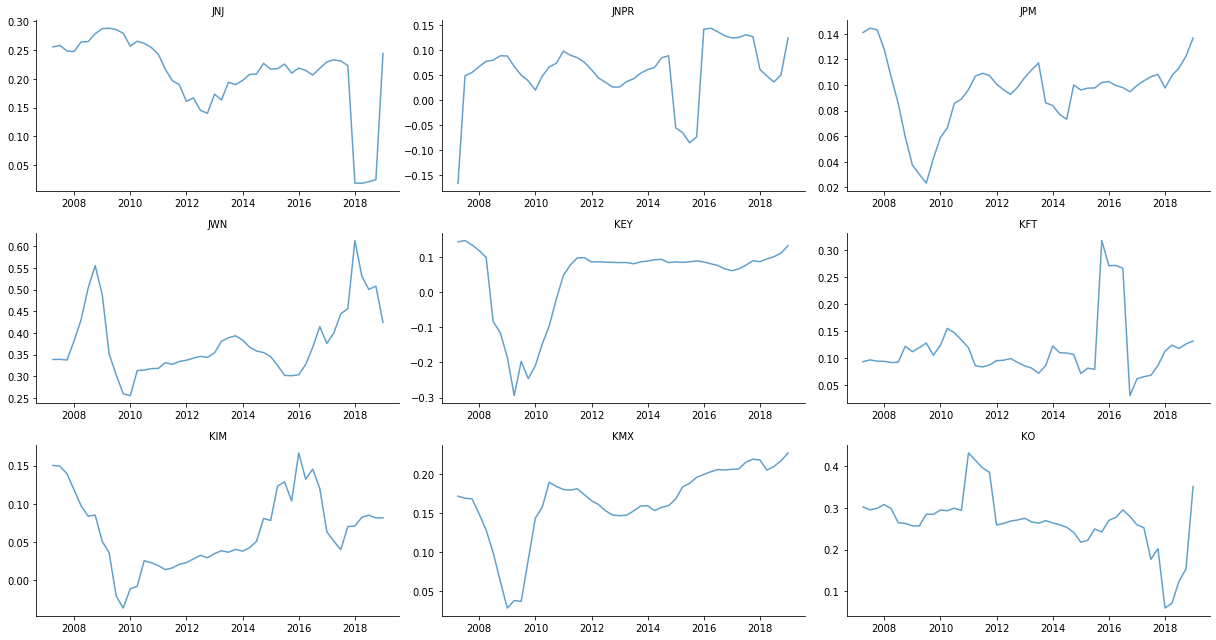









Batch 26


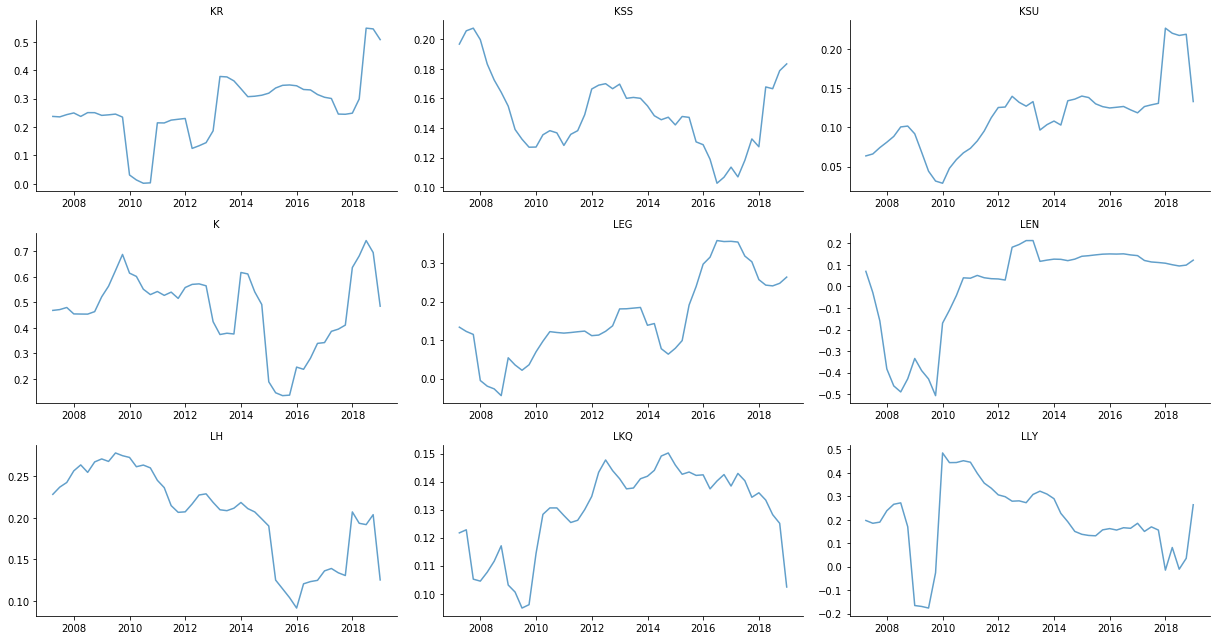









Batch 27


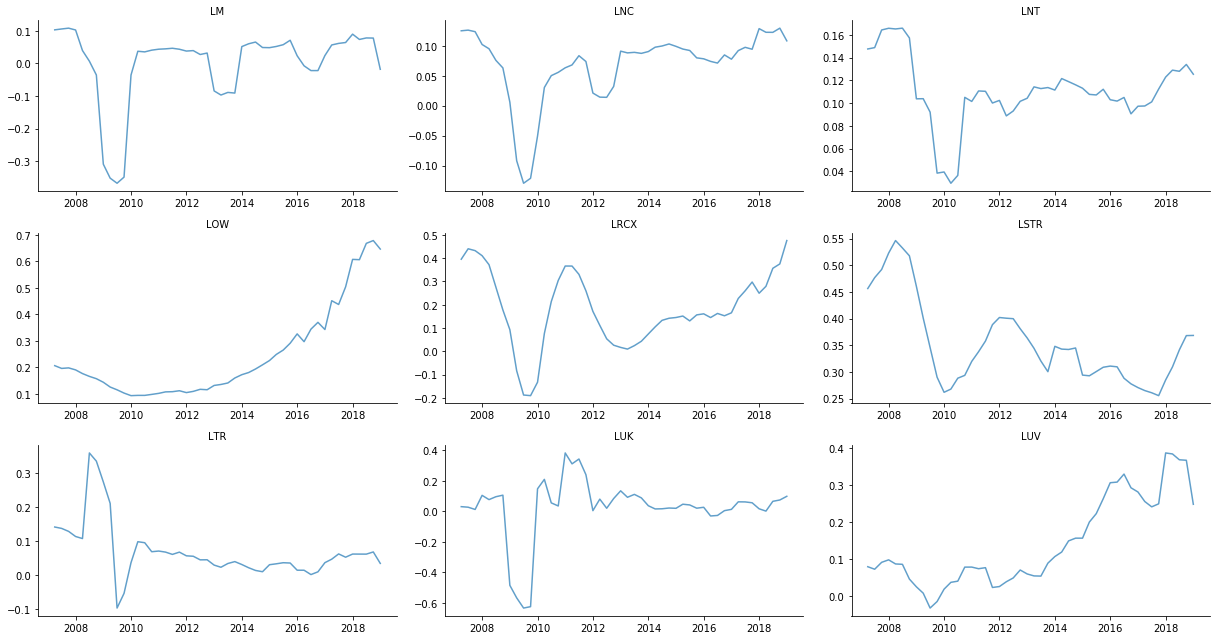









Batch 28


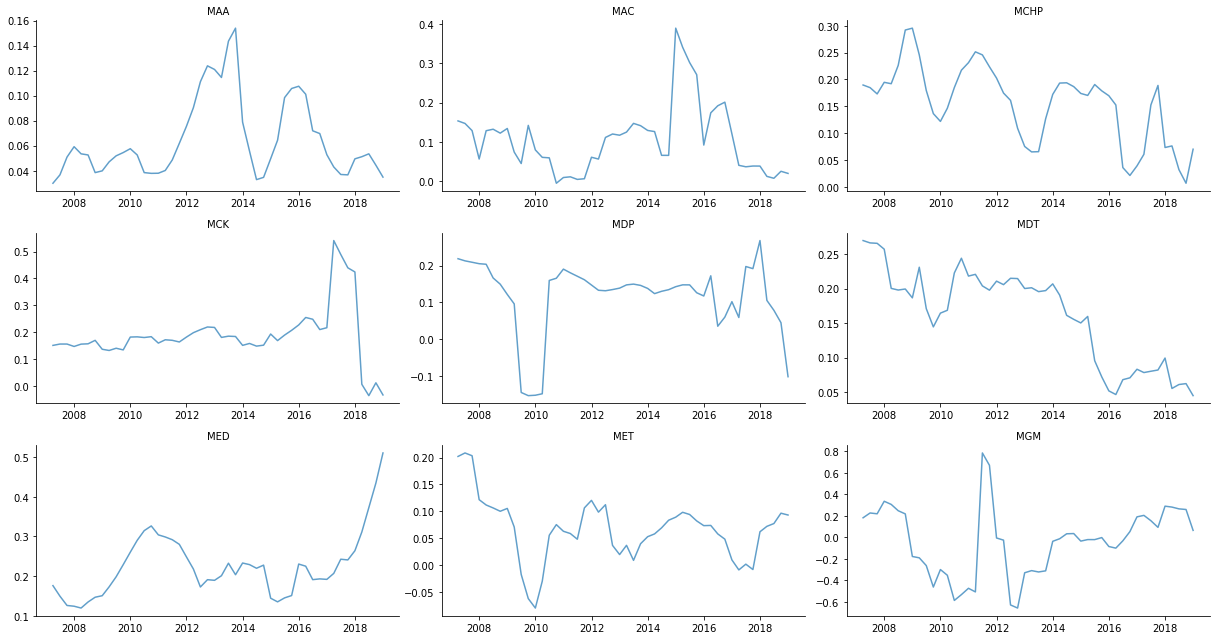









Batch 29


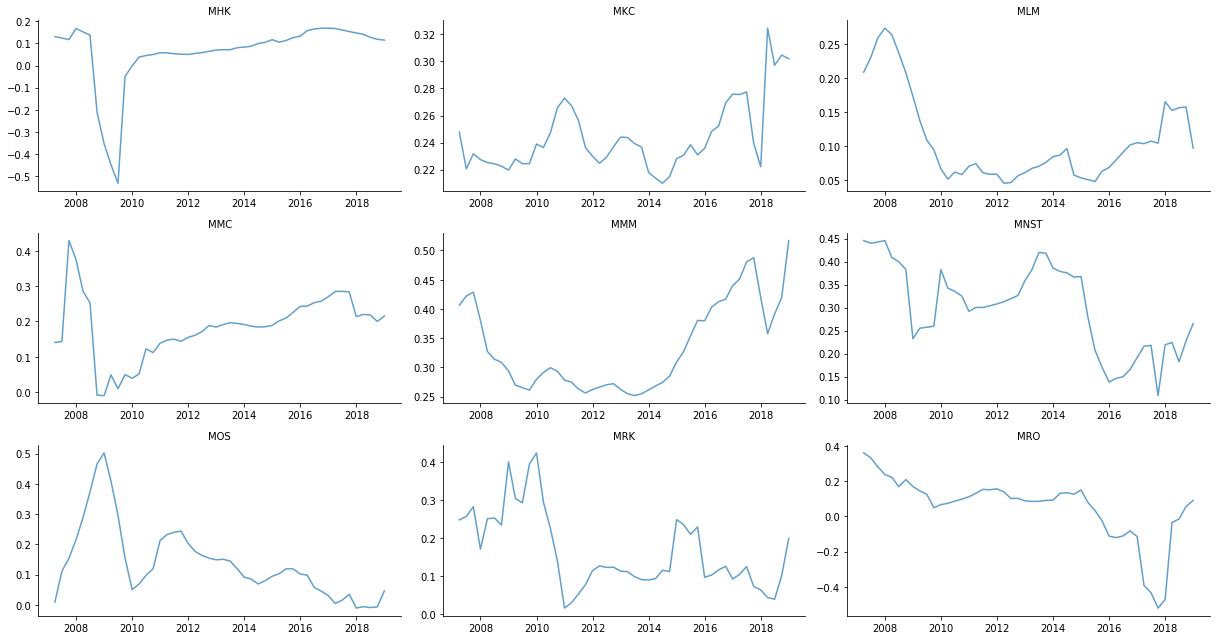









Batch 30


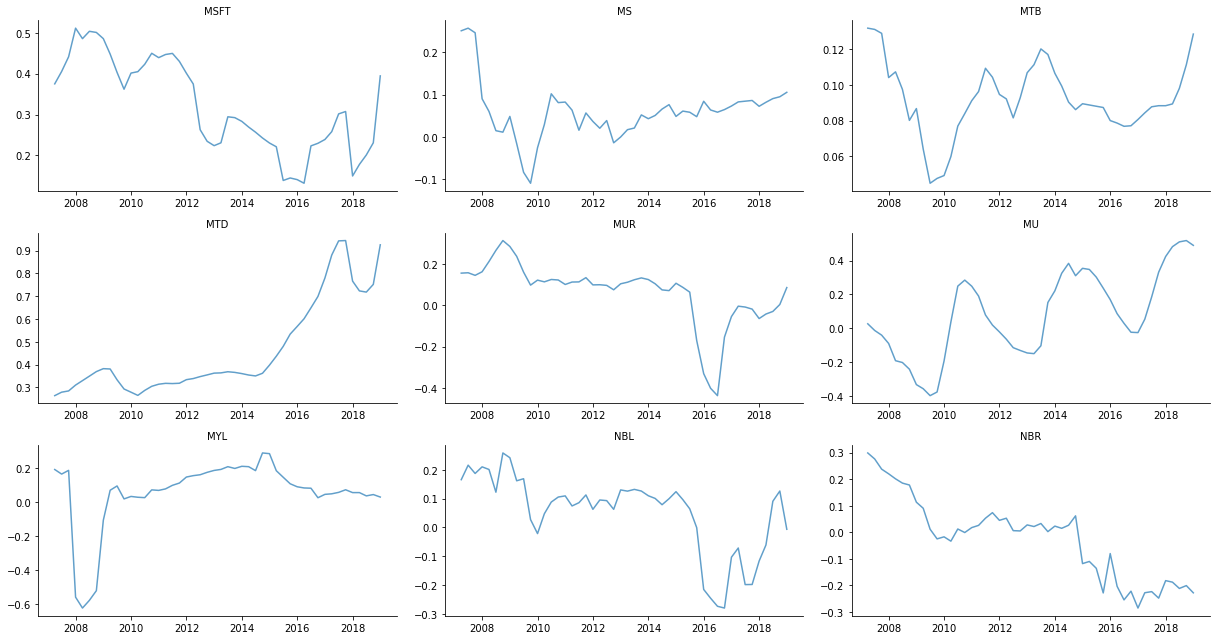









Batch 31


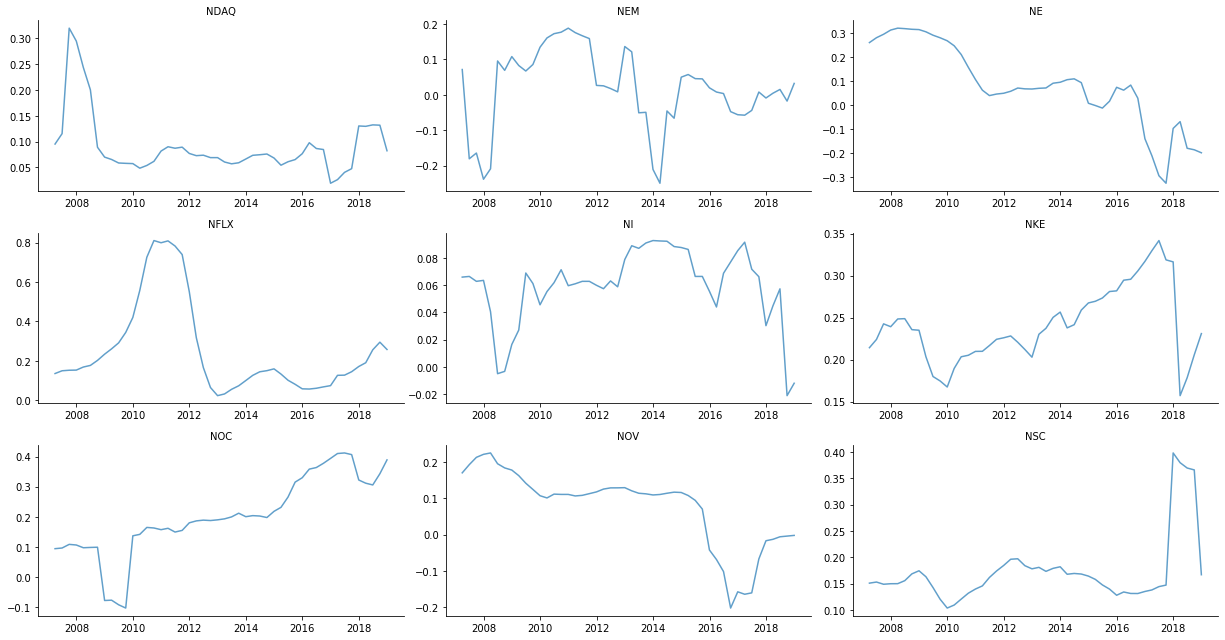









Batch 32


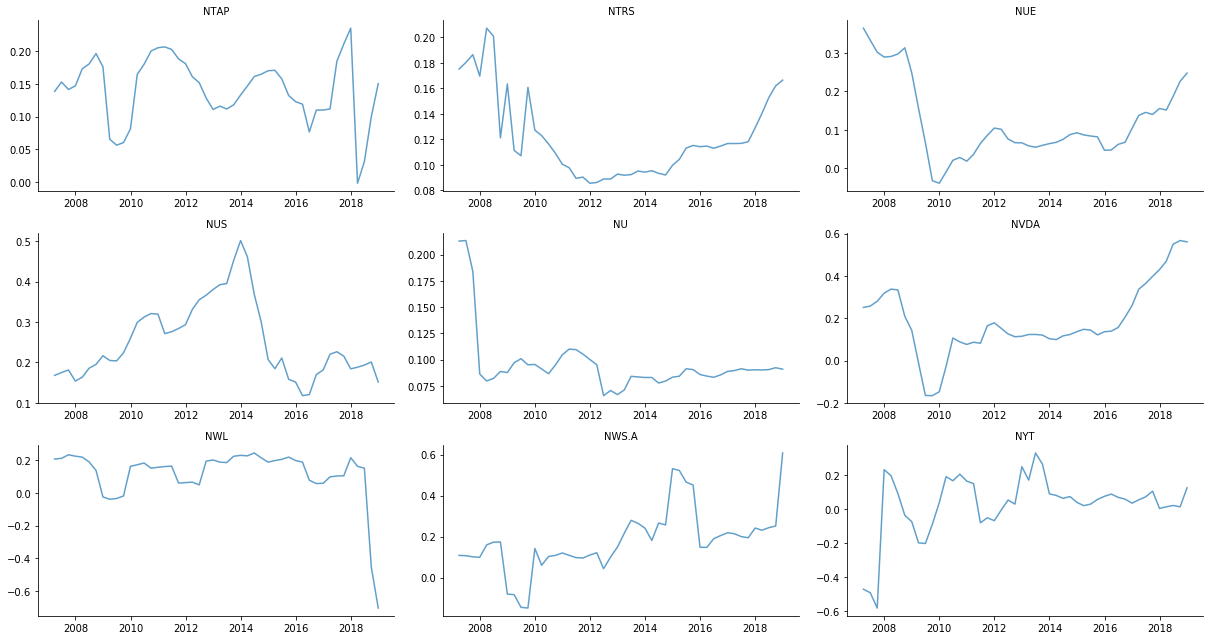









Batch 33


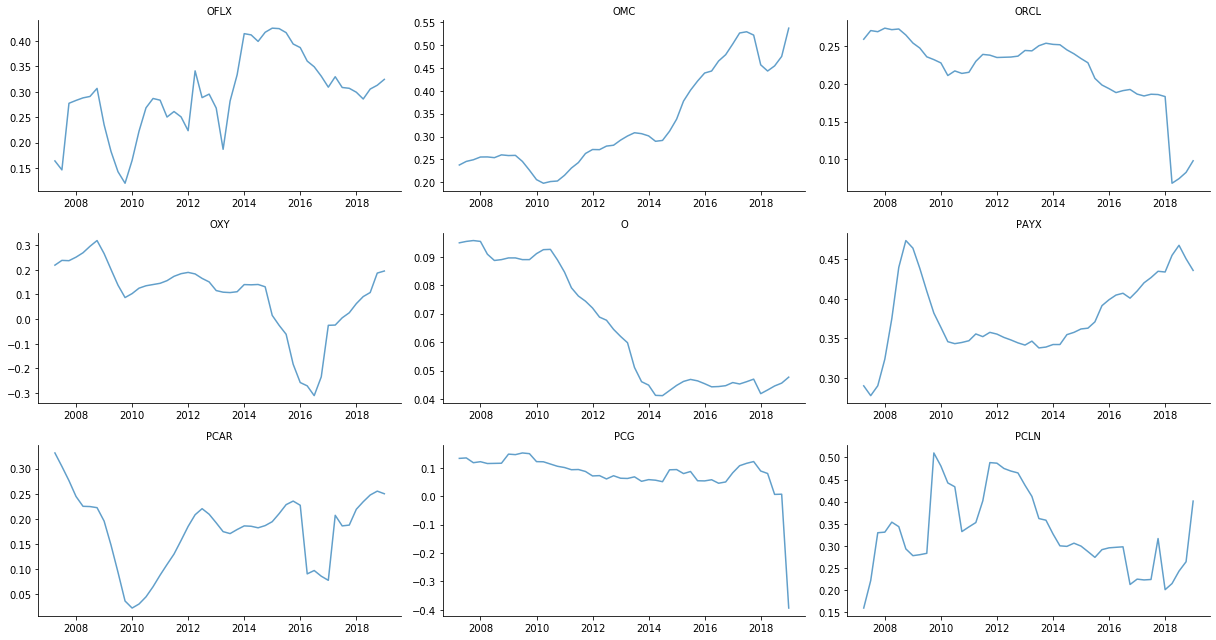









Batch 34


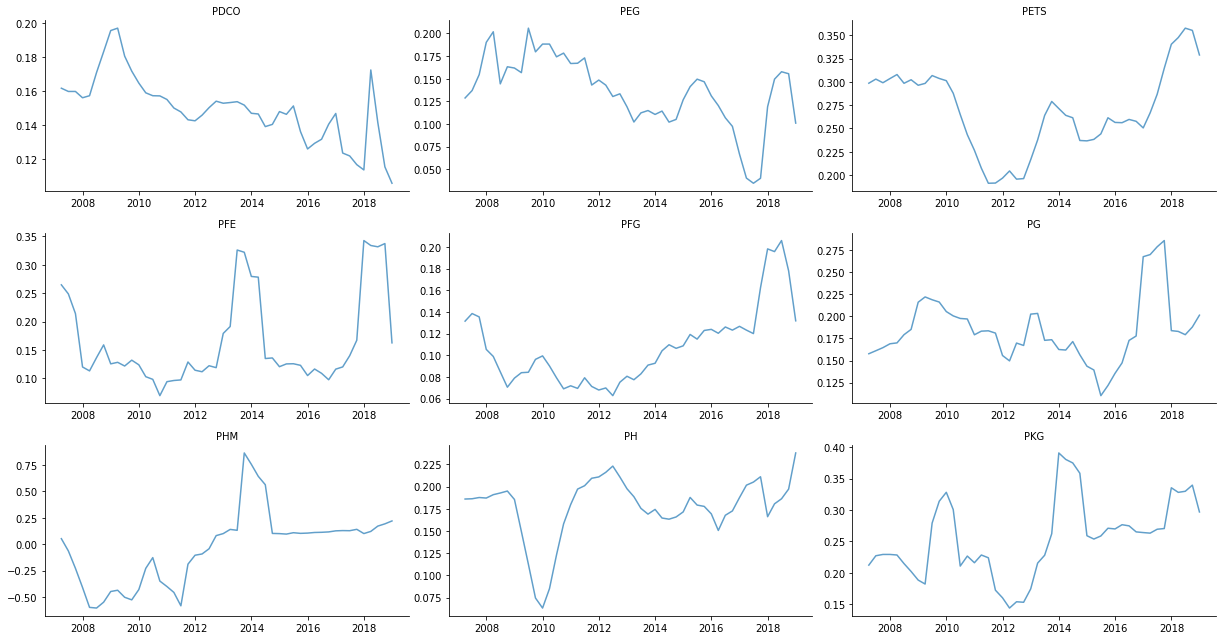









Batch 35


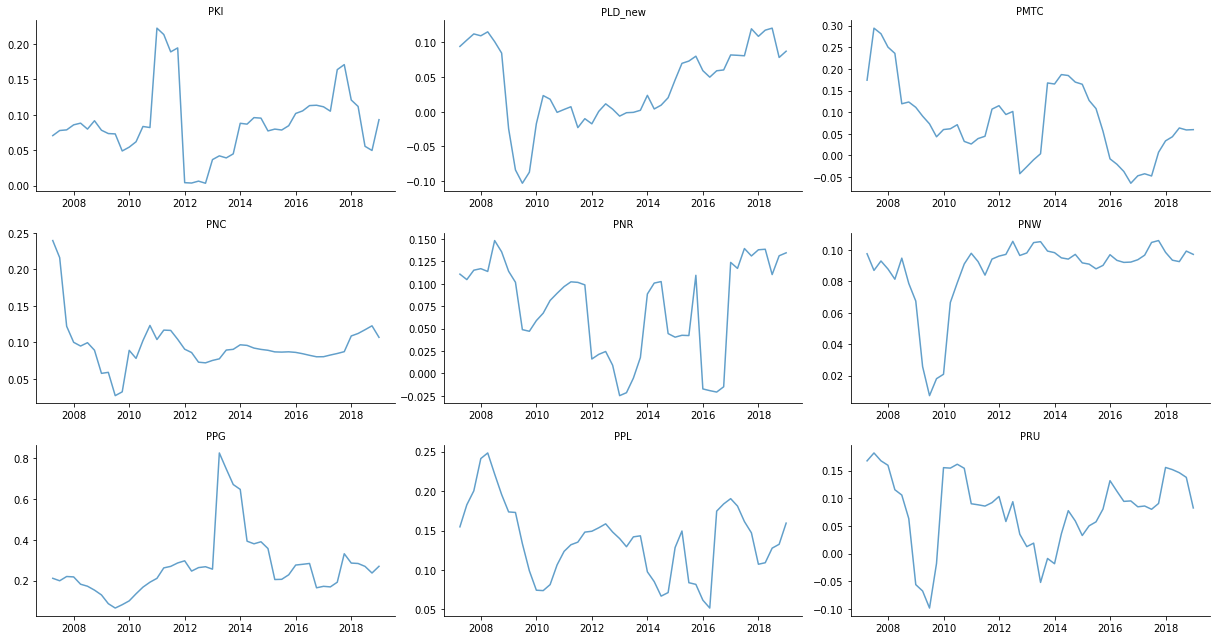









Batch 36


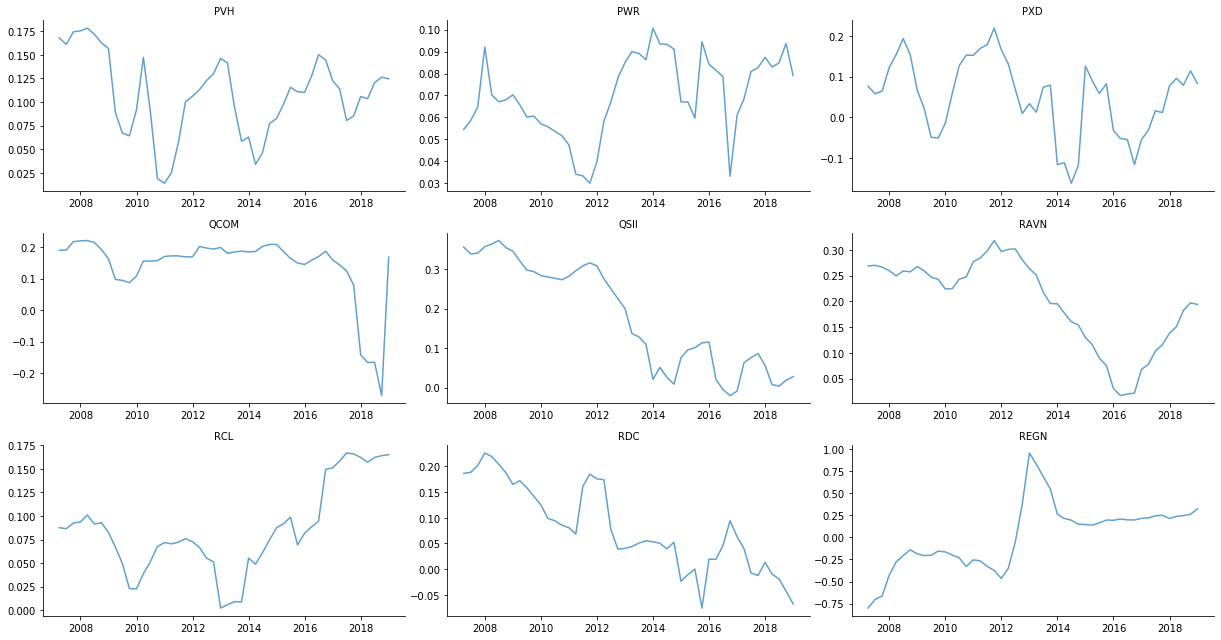









Batch 37


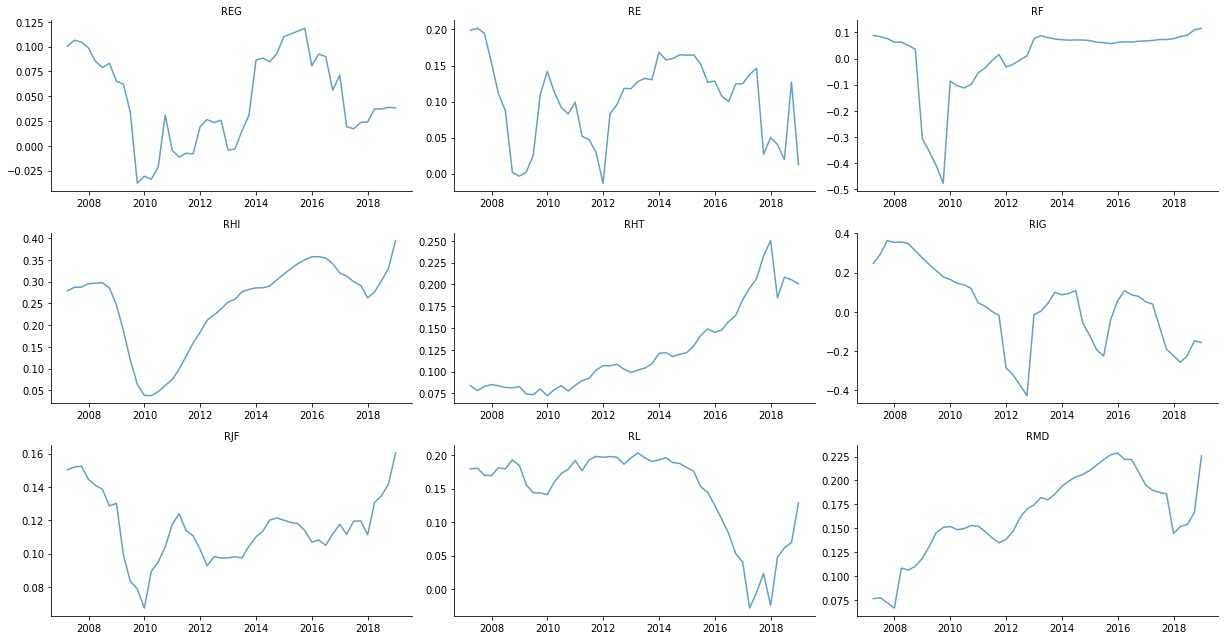









Batch 38


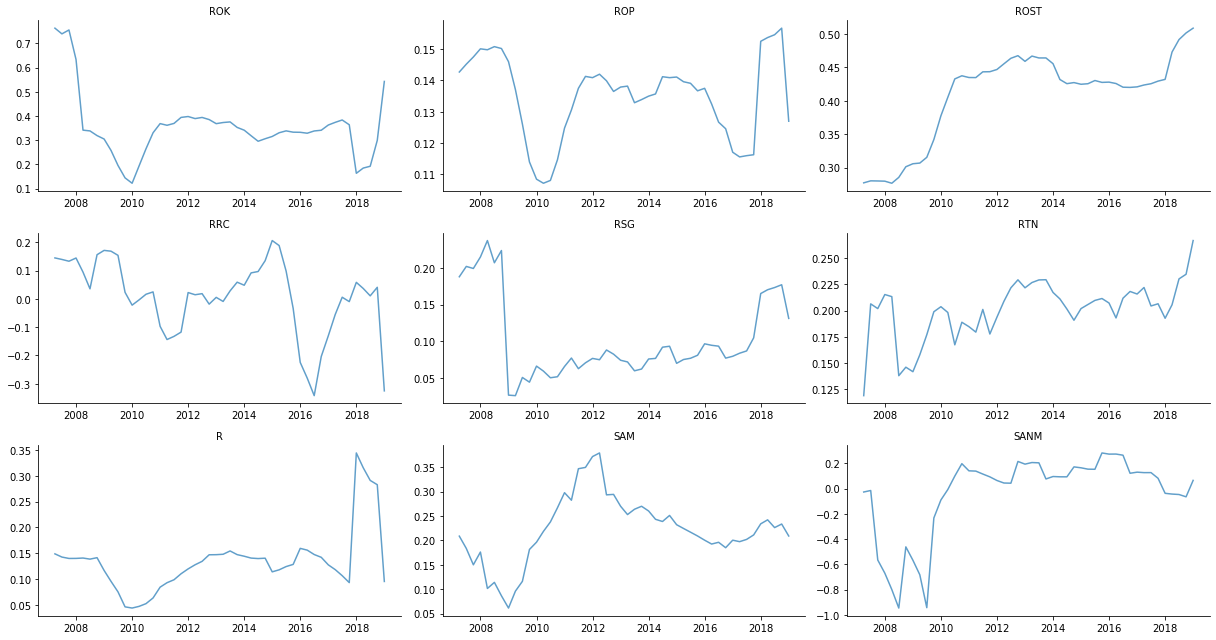









Batch 39


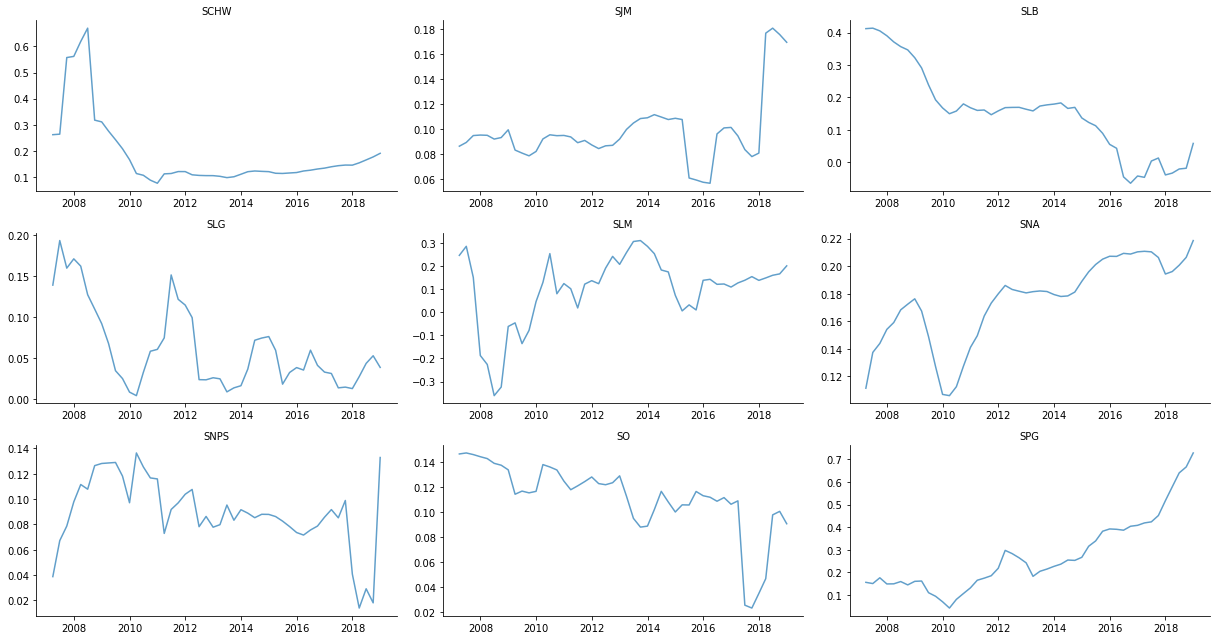









Batch 40


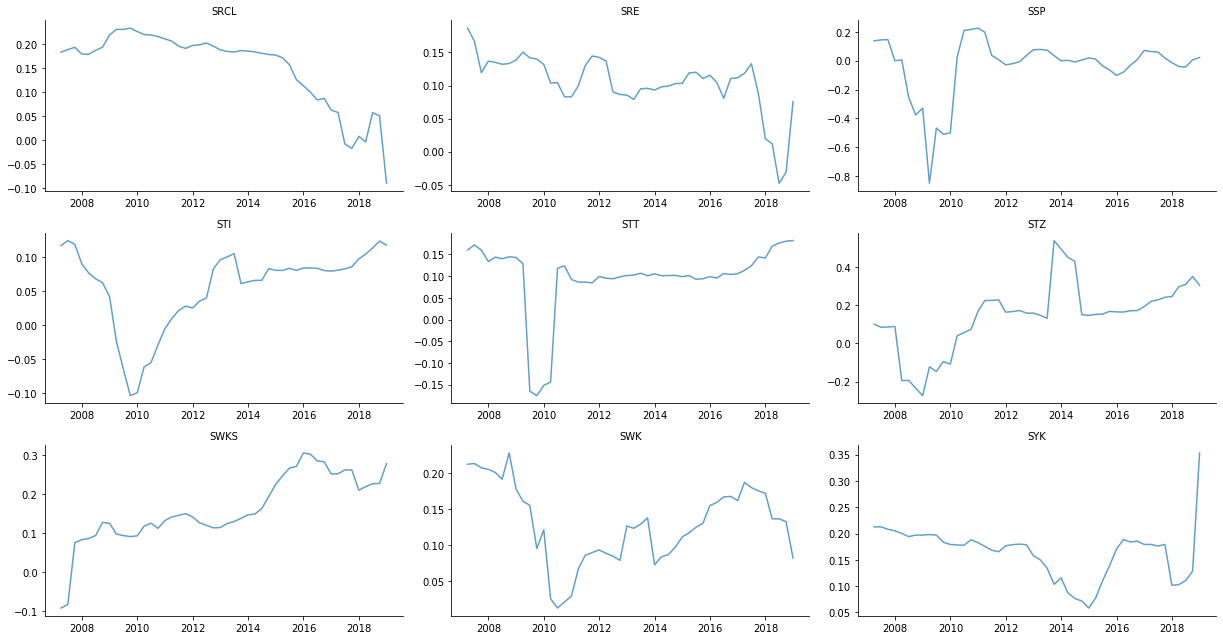









Batch 41


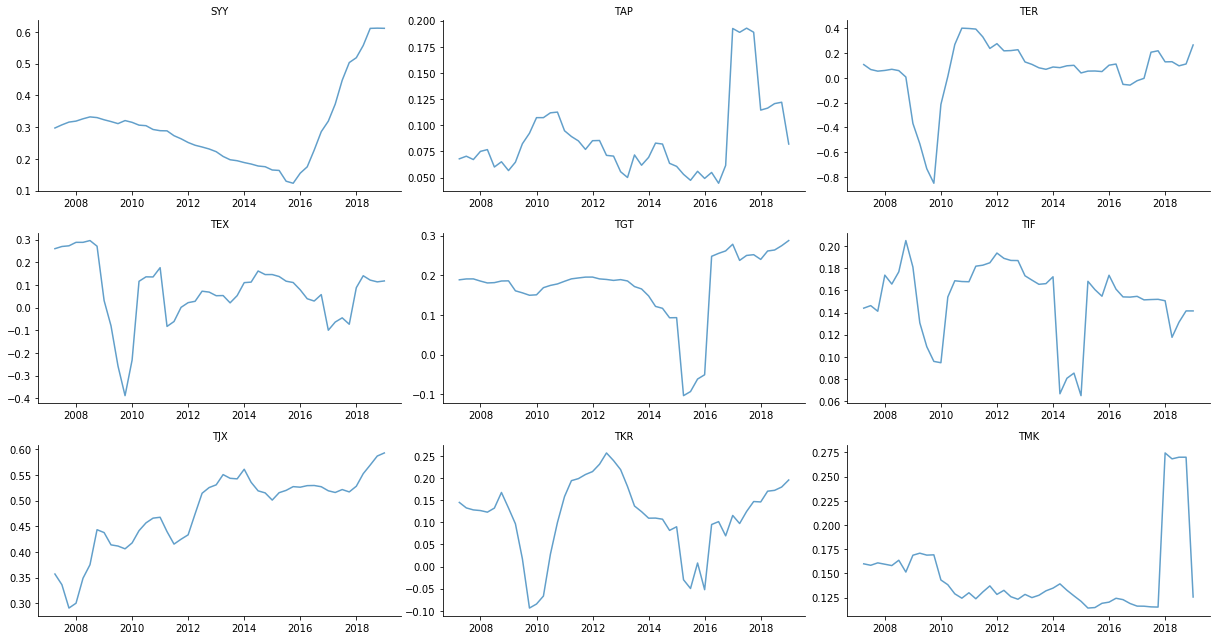









Batch 42


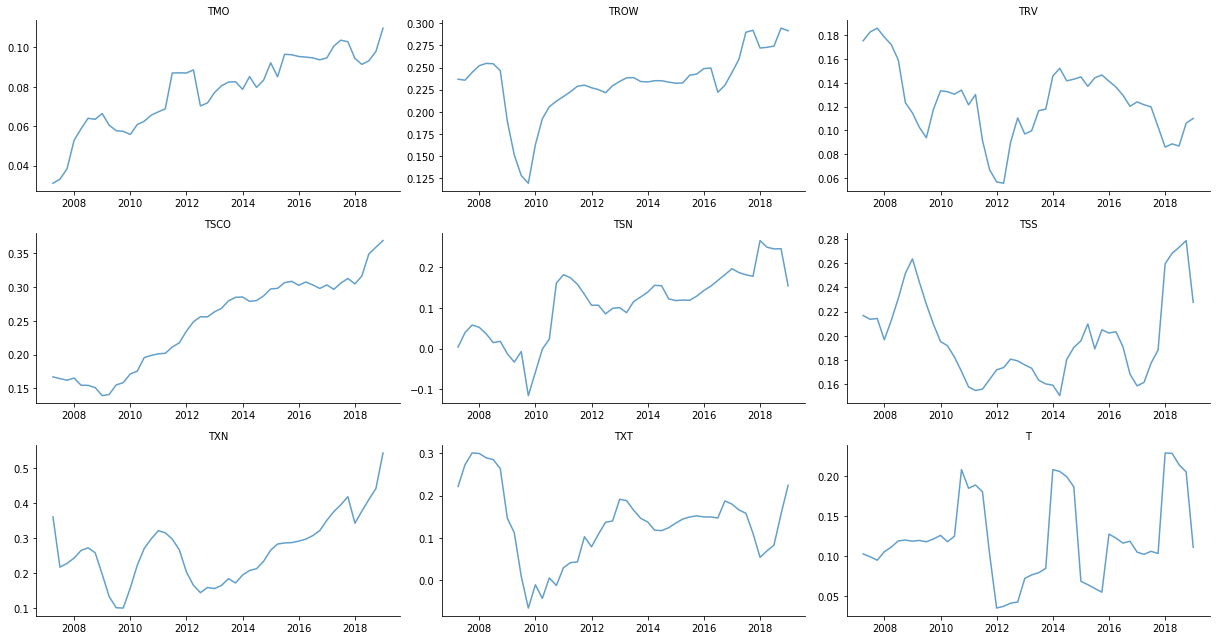









Batch 43


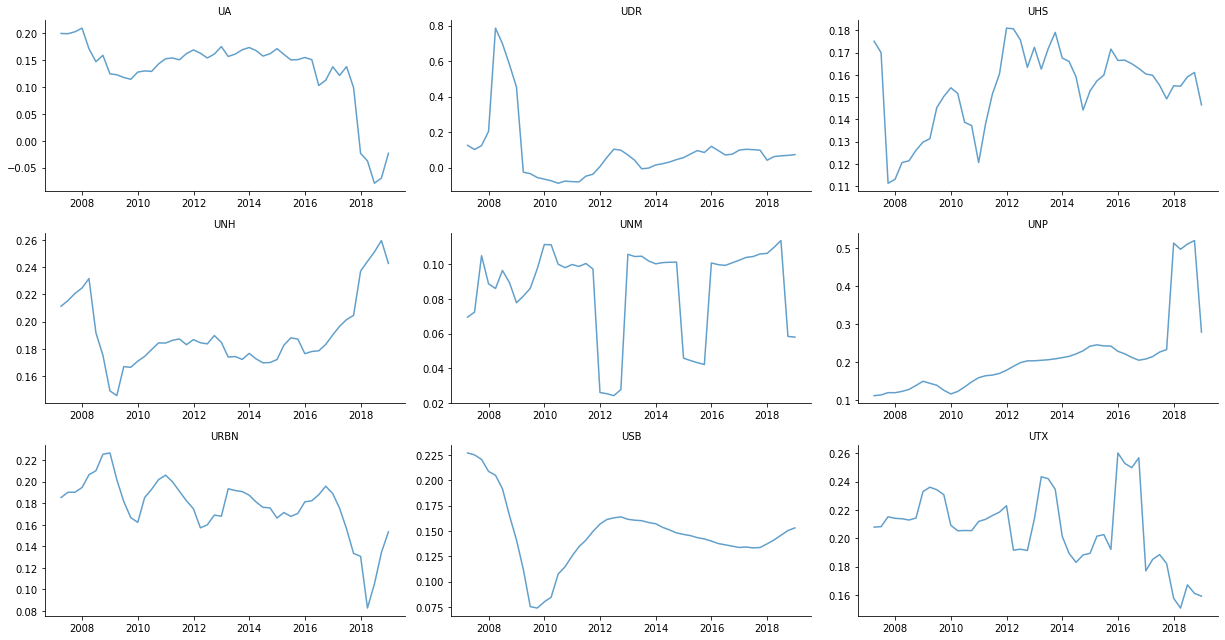









Batch 44


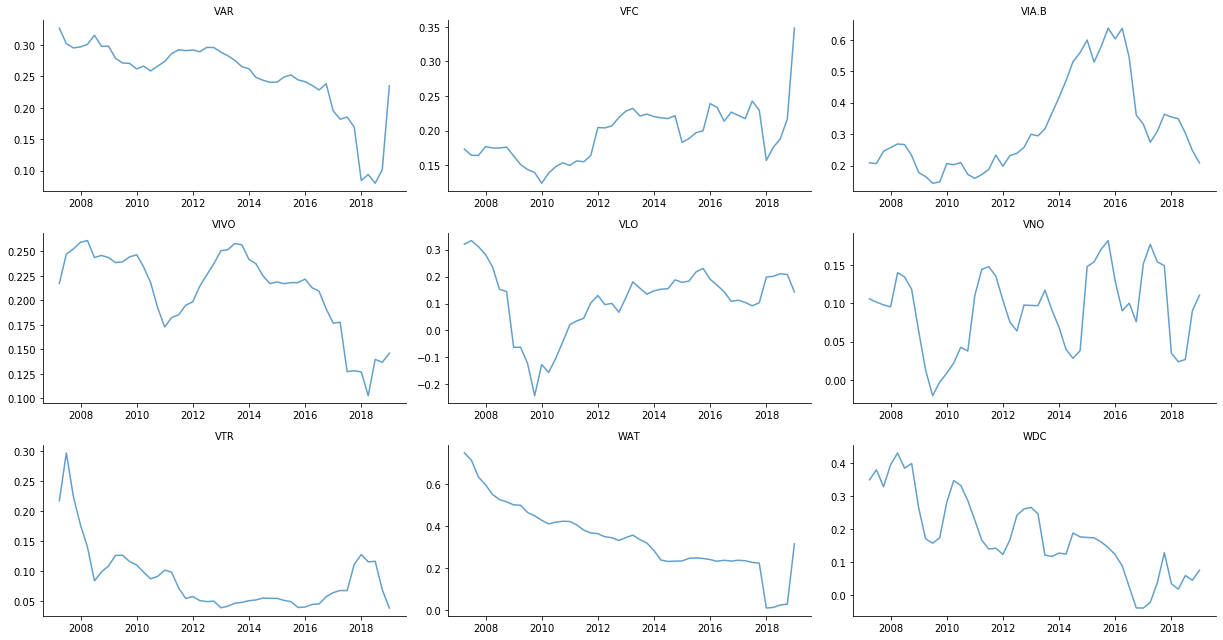









Batch 45


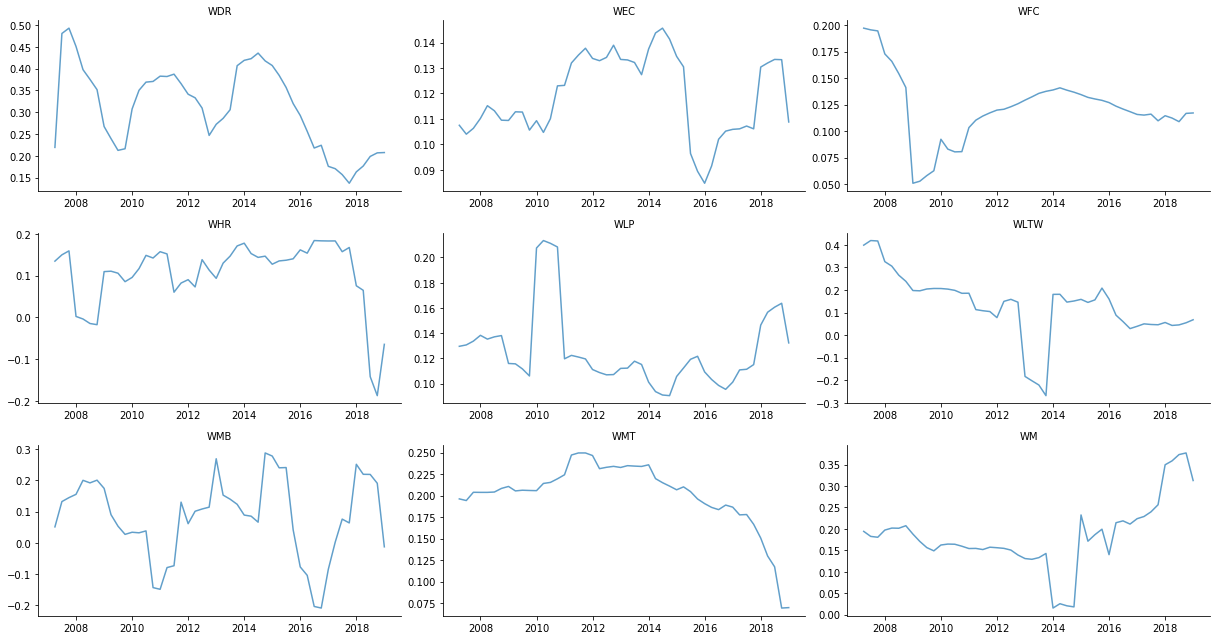









Batch 46


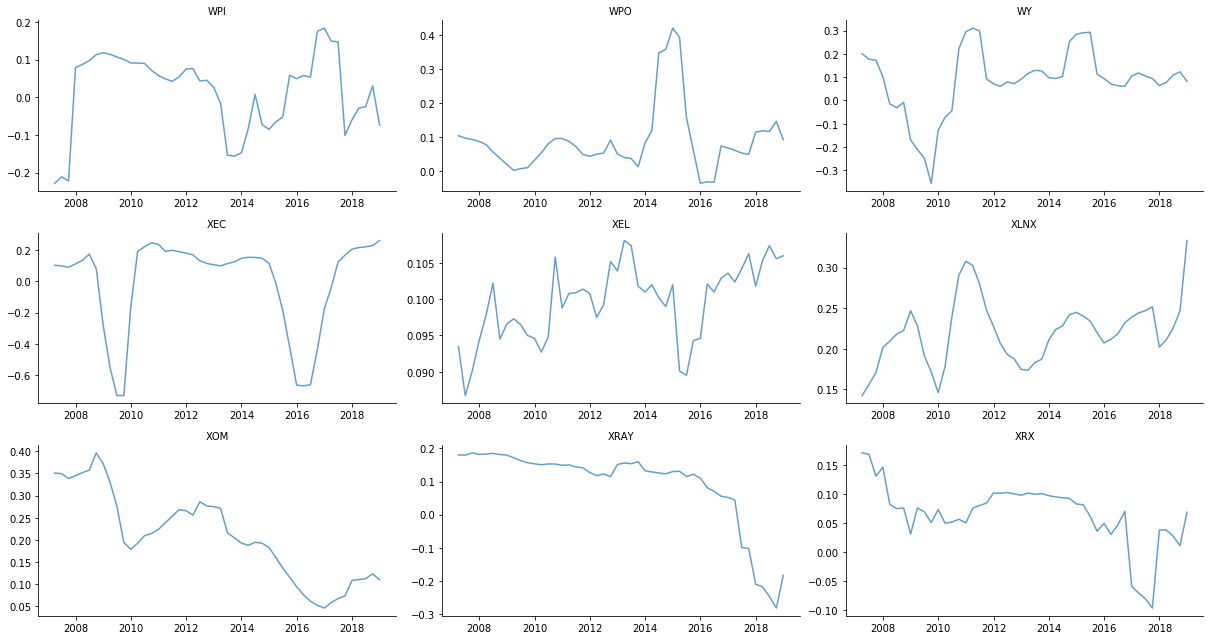

In [14]:
for i in range(nloops):
    nn = len(df.columns)
    lower = i*n_plots
    upper = (i+1)*n_plots
    #print(lower, upper)
    temp_list = df.columns[lower:upper]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    ####----PLOT THE FIGURES---------#####
    ### legend labels
    dot_labels = ['Price', 'Company', 'Market']
    temp_list_of_axis = []
    
    ### instantiage
    fig, ax = plt.subplots(n_rows,n_cols,figsize=(17,9))
    for k in range(n_rows):
        for l in range(n_cols):
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### company prices, worst 5 dates with worst returns
            #temp_worst_prices = worst_days_prices[symbol]
            ### comapny returns, worst 5 systemic dates with worst returns
            #temp_worst_prices_sys = worst_days_sys_prices[symbol]

            ### Company Timeseries            
            wt = ax[k, l].plot(dates, df[symbol].values, label='Quarterly DE ratio'.format(symbol), alpha=0.7)            

            ### PLOT: 5 worst company dates
            #wc = ax[k, l].scatter(temp_worst_prices.index, temp_worst_prices.values, 
            #           color='red', 
            #           linewidths=red_dot, 
            #           edgecolor='red') 
                       #label='Worst Company Trading')
            ### PLOT: Returns on 5 worst systemic dates 
            #wm = ax[k,l].scatter(temp_worst_prices_sys.index, temp_worst_prices_sys.values, 
            #           color='black', 
            #           linewidths=black_dot, 
            #           edgecolor='black') 
                       #label='Worst Market Trading Days')            



            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
            ax[k,l].set_title(symbol, fontsize=sub_title_font) 
            #ax[k,l].set_xlabel(fontsize=x_axis_font)
            ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
            ax[k,l].tick_params(axis="y", labelsize=axis_font)
            #ax[k,l].set_ylim([-0.45, 0.45])            
            #temp_list_of_axis.append([wt, wc, wm])
            temp_list_of_axis.append(wt)
         
            
            
    #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
    #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
    fig.subplots_adjust(hspace=0.7)
    #leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
    #           #title='Worst Trading Days', title_fontsize=25, 
    #           bbox_to_anchor=(1.0, 0.97), 
    #           prop={'size':legend_font})#, fontsize=sup_title_font)
    #leg.set_in_layout(False)
    #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
    plt.tight_layout()
    plt.show()
    #plt.savefig('plots\\timeseries\\price_timeseries_batch{}.png'.format(i+1), dpi=220) 
        
#             for tick in ax[k, l].get_xticklabels():
#                 tick.set_rotation(20)
#                 tick.

### Leftover plots (3)

In [17]:
### matrix of subplots
n_cols = 2
n_rows = 2
n_plots = n_cols*n_rows
nloops = 1
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)









Batch 0


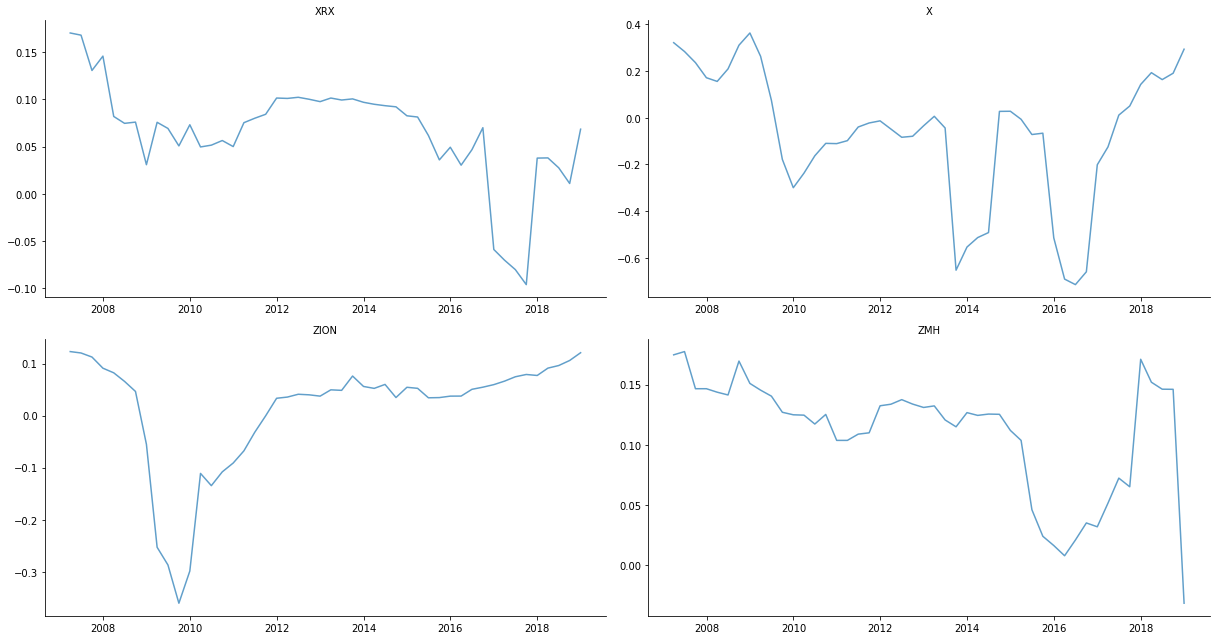

In [18]:
for i in range(nloops):
    nn = len(df.columns)
    #print(lower, upper)
    temp_list = df.columns[-n_plots:]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    ####----PLOT THE FIGURES---------#####
    dot_labels = ['Price', 'Company', 'Market']
    temp_list_of_axis = []
    
    fig, ax = plt.subplots(n_rows, n_cols,figsize=(17,9))
    for k in range(n_rows):
        for l in range(n_cols):
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### company prices, worst 5 dates with worst returns
            #temp_worst_prices = worst_days_prices[symbol]
            ### comapny returns, worst 5 systemic dates with worst returns
            #temp_worst_prices_sys = worst_days_sys_prices[symbol]

            ### Company Timeseries            
            wt = ax[k, l].plot(dates, df[symbol].values, label='Quarterly DE ratio'.format(symbol), alpha=0.7)            

            ### PLOT: 5 worst company dates
            #wc = ax[k, l].scatter(temp_worst_prices.index, temp_worst_prices.values, 
            #           color='red', 
            #           linewidths=red_dot, 
            #           edgecolor='red') 
                       #label='Worst Company Trading')
            ### PLOT: Returns on 5 worst systemic dates 
            #wm = ax[k,l].scatter(temp_worst_prices_sys.index, temp_worst_prices_sys.values, 
            #           color='black', 
            #           linewidths=black_dot, 
            #           edgecolor='black') 
                       #label='Worst Market Trading Days')            



            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
            ax[k,l].set_title(symbol, fontsize=sub_title_font) 
            #ax[k,l].set_xlabel(fontsize=x_axis_font)
            ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
            ax[k,l].tick_params(axis="y", labelsize=axis_font)
            #ax[k,l].set_ylim([-0.45, 0.45])            
            #temp_list_of_axis.append([wt, wc, wm])
            temp_list_of_axis.append(wt)
         
            
            
    #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
    #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
    fig.subplots_adjust(hspace=0.7)
    #leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
    #           #title='Worst Trading Days', title_fontsize=25, 
    #           bbox_to_anchor=(1.0, 0.97), 
    #           prop={'size':legend_font})#, fontsize=sup_title_font)
    #leg.set_in_layout(False)
    #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
    plt.tight_layout()
    plt.show()
    #plt.savefig('plots\\timeseries\\price_timeseries_batch{}.png'.format(i+1), dpi=220) 
        
#             for tick in ax[k, l].get_xticklabels():
#                 tick.set_rotation(20)
#                 tick.